In [171]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np 
import os
import missingno as msno
import sweetviz as sv

In [172]:
excel_path_trait=r"C:/Users/wafab/Downloads/Project 2/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx"
if os.path.exists(excel_path_trait):
    trait=pd.read_excel(excel_path_trait)
else:
    print(f"the file does not exists at {excel_path_trait}")


In [173]:
#to display all the columns:
pd.set_option('display.max_columns',None)

In [68]:
trait.head(10)

Species                            Sp         Family  \
0           Abudefduf saxatilis           Abudefduf_saxatilis  POMACENTRIDAE   
1  Acanthostracion quadricornis  Acanthostracion_quadricornis    OSTRACIIDAE   
2    Acanthostracion polygonius    Acanthostracion_polygonius    OSTRACIIDAE   
3           Acanthurus bahianus           Acanthurus_bahianus   ACANTHURIDAE   
4          Acanthurus chirurgus          Acanthurus_chirurgus   ACANTHURIDAE   
5          Acanthurus coeruleus          Acanthurus_coeruleus   ACANTHURIDAE   
6             Aluterus scriptus             Aluterus_scriptus  MONACANTHIDAE   
7      Anisotremus surinamensis      Anisotremus_surinamensis     HAEMULIDAE   
8        Anisotremus virginicus        Anisotremus_virginicus     HAEMULIDAE   
9          Aulostomus maculatus          Aulostomus_maculatus   AULOSTOMIDAE   

             Genus          Spec  MaxLengthTL  Body_size_max  MaxLengthSL  \
0        Abudefduf     saxatilis        22.90           23.0        16.82   
1  Acanthostracion  quadricornis        55.00           55.0        45.10   
2  Acanthostracion    polygonius        50.00           50.0        41.00   
3       Acanthurus      bahianus        46.48          381.0        38.10   
4       Acanthurus     chirurgus        39.00           39.0        31.98   
5       Acanthurus     coeruleus        39.00           39.0        31.98   
6         Aluterus      scriptus       110.00          110.0        90.20   
7      Anisotremus  surinamensis        76.00           76.0        62.32   
8      Anisotremus    virginicus        40.60          406.0        33.29   
9       Aulostomus     maculatus       100.00          100.0        82.00   

   MaxJuvLength  AspectRatio  AspectRatio_Q    Log_AR       swim_type  \
0           6.0     1.538830       1.538830  0.431022        pectoral   
1           NaN     1.369590       1.369590  0.314511  dorsal_ventral   
2           NaN     0.380000       0.375069       NaN  dorsal_ventral   
3           7.0     2.428510       2.430000  0.887278        pectoral   
4           8.0     1.873600       1.867165  0.627862        pectoral   
5          15.0     3.489290       3.489290  1.249698        pectoral   
6          20.0     0.864597       0.864597 -0.145492  dorsal_ventral   
7           NaN     2.784500       2.217930  1.024068     body_caudal   
8           NaN     1.946540       1.773690  0.666053     body_caudal   
9          10.0     1.185480       1.239800  0.170148  dorsal_ventral   

         swim_mode           body_shape  Total.length.Body.depth.ratio  \
0        labriform  short and / or deep                           2.50   
1  tetraodontiform  short and / or deep                           3.30   
2  tetraodontiform  short and / or deep                           3.23   
3        labriform           short/deep                           2.70   
4        labriform           short/deep                           2.30   
5        labriform           short/deep                           2.00   
6      balistiform  short and / or deep                           4.10   
7   subcarangiform  short and / or deep                           2.80   
8   subcarangiform  short and / or deep                           2.60   
9      balistiform            elongated                          14.40   

   presence_defense  ComDepthMax  DepthMax  Depth_min  Depth_max  Depth_range  \
0                 0           10        20        0.0       40.0         40.0   
1                 1           30        80        1.0       80.0         79.0   
2                 1           42        90        3.0       80.0         77.0   
3                 1           25        40        2.0       40.0         38.0   
4                 1           15        25        2.0       25.0         23.0   
5                 1           18        40        2.0       40.0         38.0   
6                 0           20       120        3.0      120.0        117.0   
7                 0         

In [5]:
trait.shape

(120, 44)

## Globaly:
-In a global sight of view, we can deduce that there is few columns that underlines the same functionalities as for exemple species ,sp and then splitted in three columns, depth max and depth range, troph and trophic level(in the README FILE : Trophic\_level: trophic level of species - contains typos and not used) , AspectRatio_Q and AspectRation.

## FOR Spawn and Spawning:

Spawn refers to the eggs and sperm released or deposited into water by aquatic animals. Spawning is the process by which this occurs.
Spawning is the act of releasing or depositing eggs and sperm into the water by aquatic animals such as fish, mollusks, and amphibians. It can occur in various environments and under different conditions.
-shoaling not used rather keep size groups (equivalent).

-Body\_size\_max: maximum total length in cm overall - contains typos and not used (README FILE).
-for AspectRatio, AspectRatio_Q : we will probably keep the most accurate one the AspectRatio_Q, as for the fact that the values in the two columns are practically the same and this column is field-based research.

==> so this columns are closely related and practically decribing the same trait , we will see their correlations with other features and probably will keep the most significant one.

here in this data set, spawn and spawning both indicates the position of the spawning process with respect to the water column indicating wether it's demersal or pelagic.
## Close features:
columns like position in water column and level water are closely related and you can deduce the second one from the first, maybe merge them or remove the level of water would be much less redundant?

### ==> let's dive deeper!


In [6]:
trait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        120 non-null    object 
 1   Sp                             120 non-null    object 
 2   Family                         120 non-null    object 
 3   Genus                          120 non-null    object 
 4   Spec                           120 non-null    object 
 5   MaxLengthTL                    120 non-null    float64
 6   Body_size_max                  119 non-null    float64
 7   MaxLengthSL                    120 non-null    float64
 8   MaxJuvLength                   67 non-null     float64
 9   AspectRatio                    120 non-null    float64
 10  AspectRatio_Q                  120 non-null    float64
 11  Log_AR                         112 non-null    float64
 12  swim_type                      120 non-null    obj

In [7]:
trait.select_dtypes(include=np.number).columns #count: 23


Index(['MaxLengthTL', 'Body_size_max', 'MaxLengthSL', 'MaxJuvLength',
       'AspectRatio', 'AspectRatio_Q', 'Log_AR',
       'Total.length.Body.depth.ratio', 'presence_defense', 'ComDepthMax',
       'DepthMax', 'Depth_min', 'Depth_max', 'Depth_range', 'Troph',
       'Trophic_level', 'Nocturnal', 'Specialist', 'Fished', 'Relief', 'Coral',
       'Cryptic', 'random'],
      dtype='object')

In [8]:
trait.select_dtypes(exclude=np.number).columns #count: 21


Index(['Species', 'Sp', 'Family', 'Genus', 'Spec', 'swim_type', 'swim_mode',
       'body_shape', 'Diet.x', 'Diet.y', 'Diel_activity', 'shoaling',
       'Size_group', 'Position.in.water.column.', 'Level_water', 'Spawn',
       'Spawning', 'Brackish', 'Multihabitat', 'Rafter', 'Home_range'],
      dtype='object')

In [9]:
trait.describe()

MaxLengthTL  Body_size_max  MaxLengthSL  MaxJuvLength  AspectRatio  \
count   120.000000     119.000000   120.000000     67.000000   120.000000   
mean     43.986750      90.361345    36.606083     11.208955     1.733621   
std      38.674115     137.771657    33.009805      7.312375     0.774097   
min       4.000000       4.000000     3.280000      3.000000     0.380000   
25%      15.240000      22.500000    12.500000      6.000000     1.197148   
50%      35.000000      46.000000    28.700000      9.000000     1.550755   
75%      57.000000      90.000000    48.367500     15.000000     2.063108   
max     200.000000     863.000000   178.880000     41.000000     4.515040   

       AspectRatio_Q      Log_AR  Total.length.Body.depth.ratio  \
count     120.000000  112.000000                     119.000000   
mean        1.728393    0.459358                       3.934370   
std         0.781303    0.421621                       2.006749   
min         0.375069   -0.784940                       1.600000   
25%         1.195903    0.179941                       2.900000   
50%         1.550755    0.438712                       3.500000   
75%         2.104204    0.724213                       4.500000   
max         4.515040    1.507414                      16.700000   

       presence_defense  ComDepthMax    DepthMax   Depth_min   Depth_max  \
count        120.000000   120.000000  120.000000  119.000000  119.000000   
mean           0.166667    32.525000   69.125000    2.310924   70.798319   
std            0.374241    36.503473   68.391921    3.931075   65.335585   
min            0.000000     2.000000    3.000000    0.000000    8.000000   
25%            0.000000    15.000000   25.000000    0.500000   30.000000   
50%            0.000000    25.000000   50.000000    1.000000   50.000000   
75%            0.000000    40.000000   91.250000    3.000000   91.000000   
max            1.000000   330.000000  400.000000   30.000000  400.000000   

       Depth_range       Troph  Trophic_level   Nocturnal  Specialist  \
count   119.000000  120.000000     119.000000  120.000000  118.000000   
mean     68.487395    3.254917      27.327731    0.158333    0.406780   
std      64.327402    0.760697      15.339718    0.366584    0.493328   
min       8.000000    2.000000       2.000000    0.000000    0.000000   
25%      30.000000    2.680000      12.500000    0.000000    0.000000   
50%      49.000000    3.460000      34.000000    0.000000    0.000000   
75%      87.500000    3.740000      37.000000    0.000000    1.000000   
max     398.000000    4.510000      45.000000    1.000000    1.000000   

           Fished      Relief       Coral     Cryptic       random  
count  120.000000  109.000000  109.000000  120.000000   120.000000  
mean     0.533333    4.522800    1.523872    0.091667  4852.683333  
std      0.500979    7.271063    5.315977    0.289765  2903.997219  
min      0.000000  -13.971772  -10.247201    0.000000    35.000000  
25%      0.000000   -0.575752   -1.162476    0.000000  2278.250000  
50%      1.000000    5.131455    1.765955    0.000000  5061.000000  
75%      1.000000    9.445818    3.199064    0.000000  7057.000000  
max      1.000000   21.161932   41.486844    1.000000  9917.000000

=> outliers to identify later in plots : MaxLengthTL	Body_size_max	MaxLengthSL Depth_max	Depth_range


In [10]:
cat_data=trait.select_dtypes(exclude=np.number)

In [11]:
cat_data.describe()

Species                   Sp    Family     Genus  \
count                   120                  120       120       120   
unique                  120                  120        30        58   
top     Abudefduf saxatilis  Abudefduf_saxatilis  LABRIDAE  Haemulon   
freq                      1                    1        24         9   

             Spec swim_type       swim_mode body_shape Diet.x Diet.y  \
count         120       120             120        120    120    119   
unique        115         5               9          7      7      7   
top     chrysurus  pectoral  subcarangiform   fusiform      C     im   
freq            2        53              43         37     52     57   

       Diel_activity  shoaling Size_group Position.in.water.column.  \
count            119       120        119                       120   
unique             3         4          5                         3   
top              day  solitary        sol                  demersal   
freq             101        71         53                       101   

       Level_water Spawn Spawning Brackish Multihabitat Rafter Home_range  
count          119   119      119      120          120    120        119  
unique           3     4        3        2            2      2          3  
top            low   PEL  pelagic       NO          YES     NO        mob  
freq            80    86       90      106           73    103         71

- some early observations:
- most common family specie is LARBRIDAE+++,SERRANIDAE++,POMACENTRIDAE+,other.
- most common swim type is pectoral.
- most common swim mode is subcarangiform.
- most common body shape is fusiform.
- most common diel_activity is in day.
- Size group:solitary++.
- Position.in.water.column:DEMERSAL+++,  - spawning: PELAGIC+++ 
- Brackfish:NO+++
 -rafter: NO+++
- multihabitat: YES+++
- Home range: mob+++
- many demersal species engage in pelagic spawning , maybe an evolutionary and environmental advatages like eggs and larvae dispersal , access to nutriment , enhancing survival ?

                                             |                                             | [  0%]   00:00 ->…


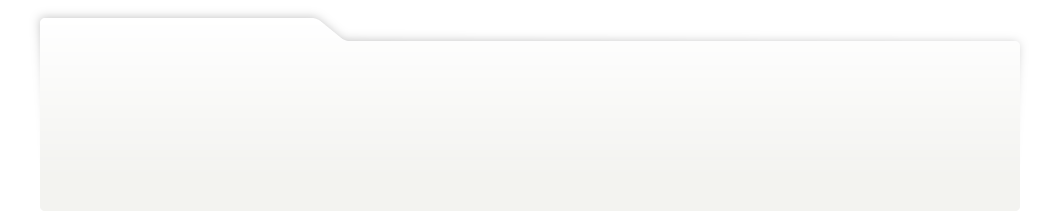
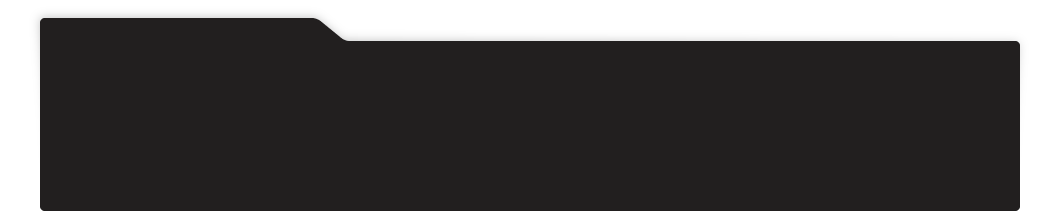
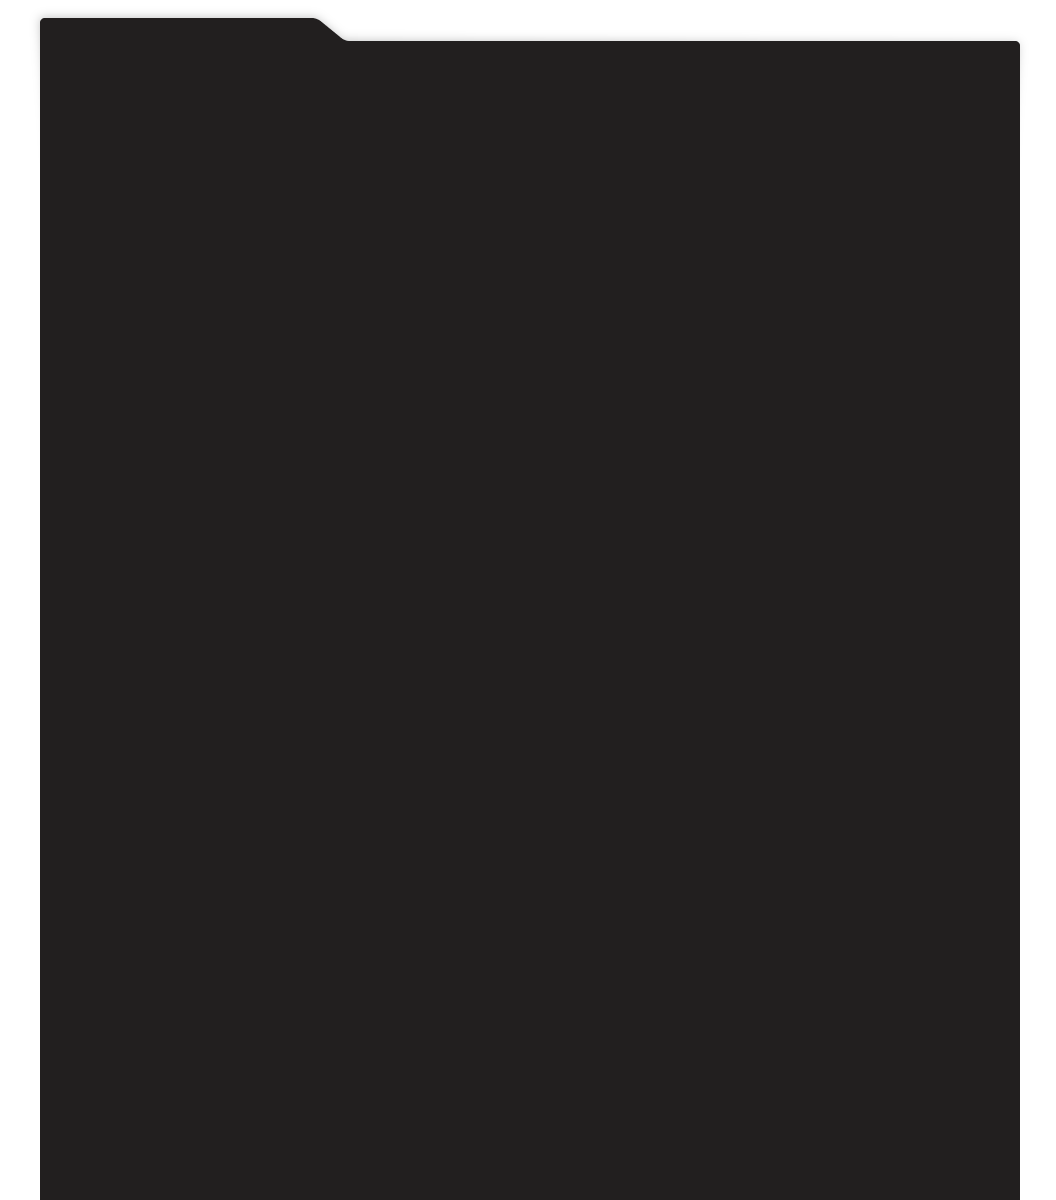
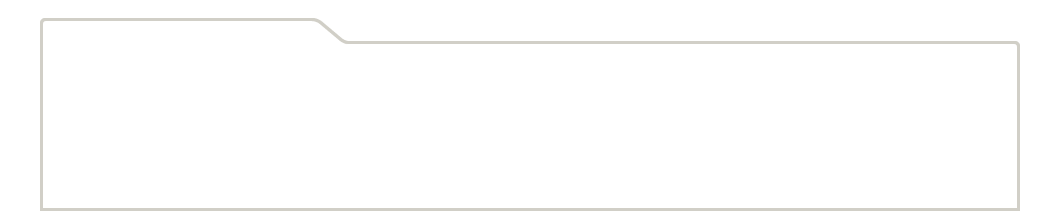
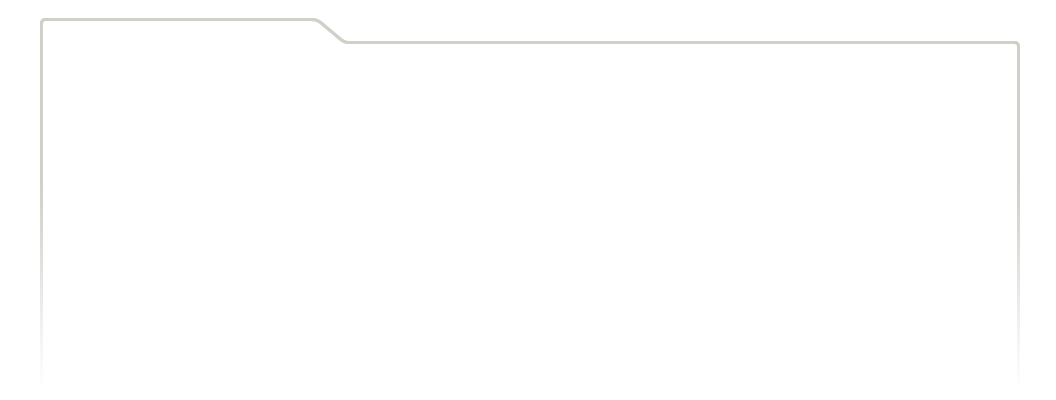
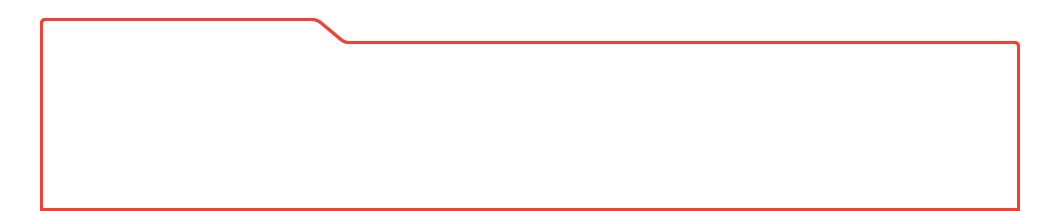
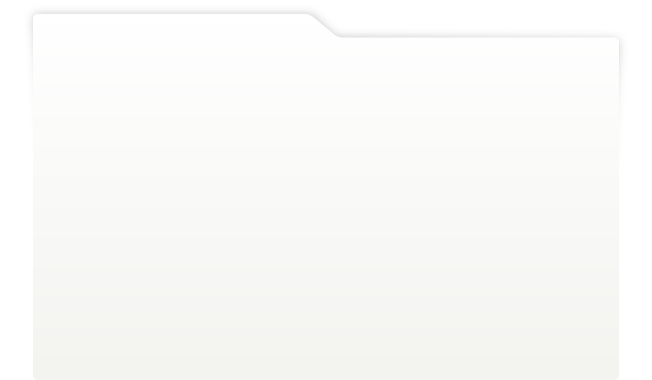
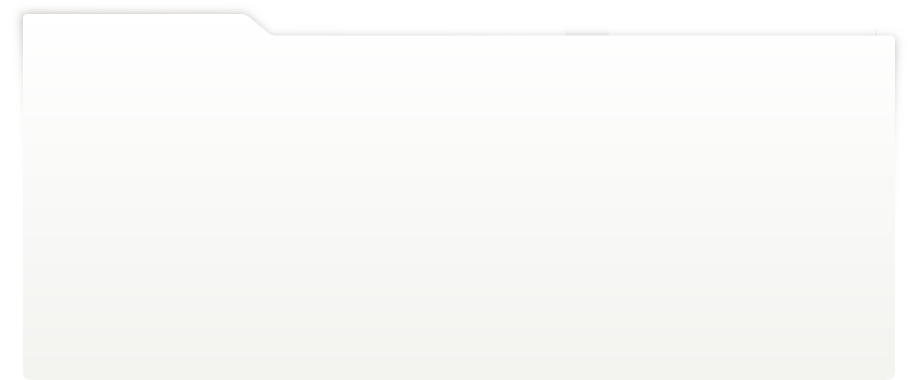
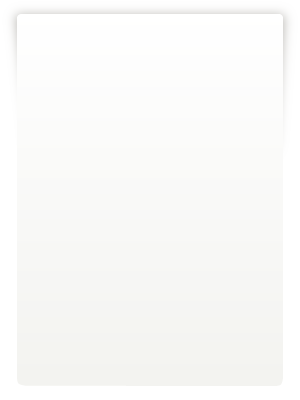
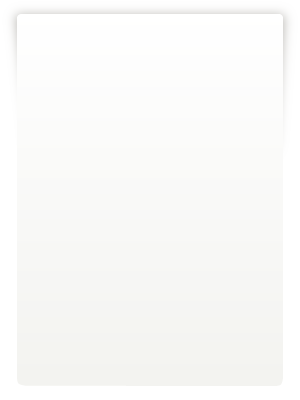
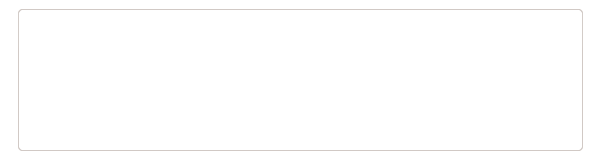
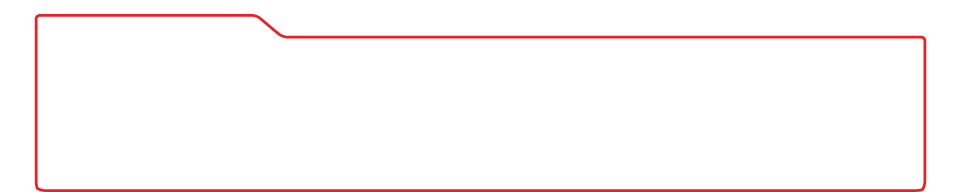
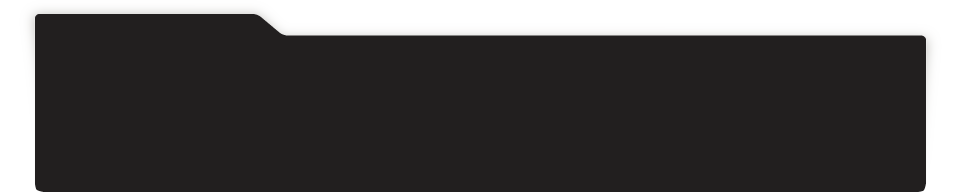
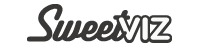
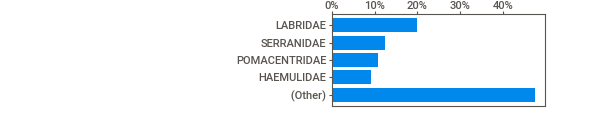
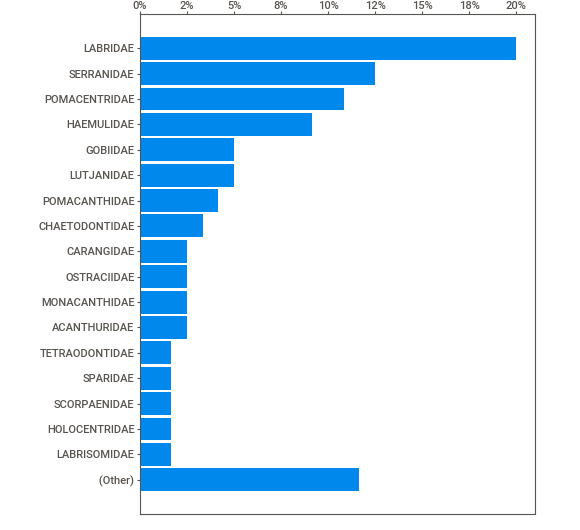
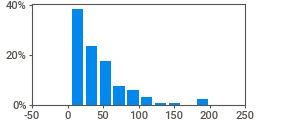
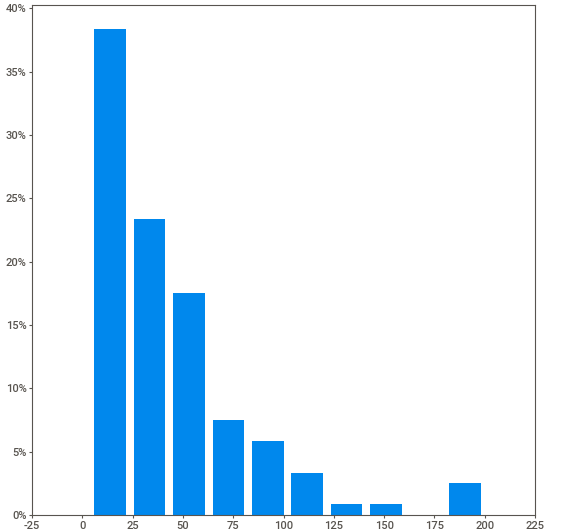
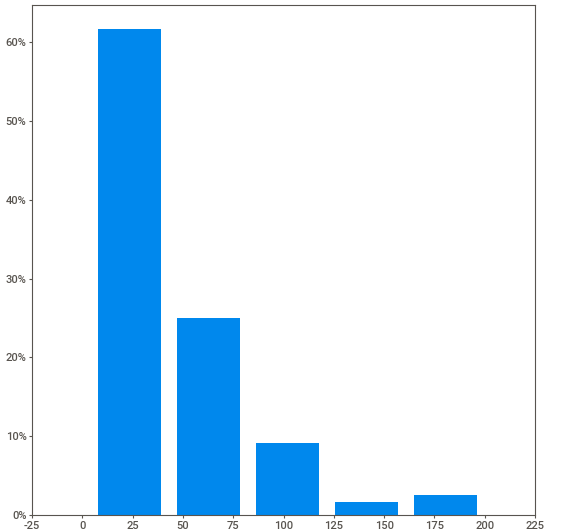
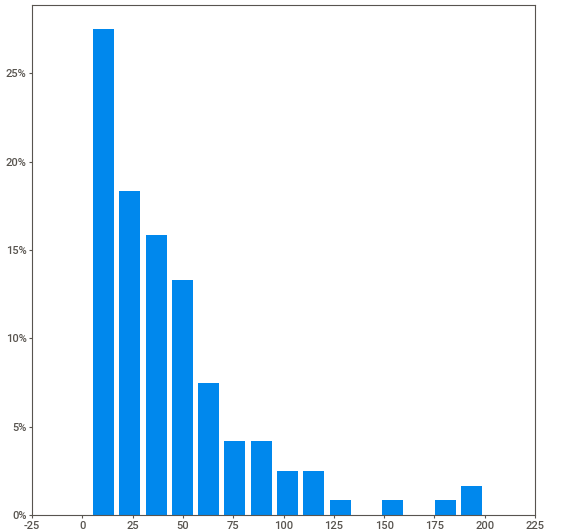
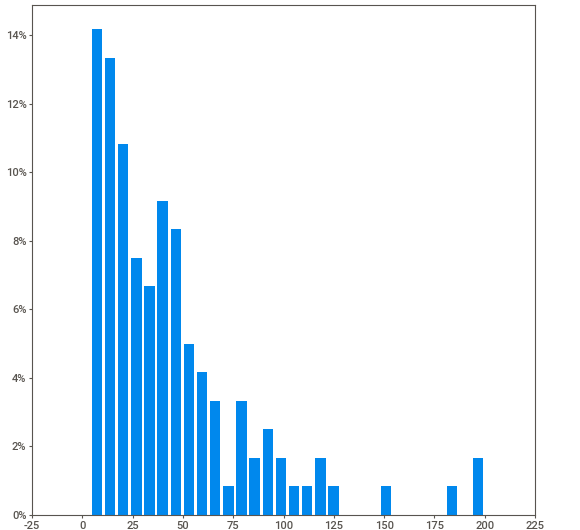
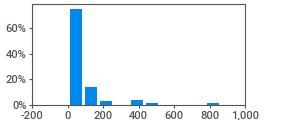
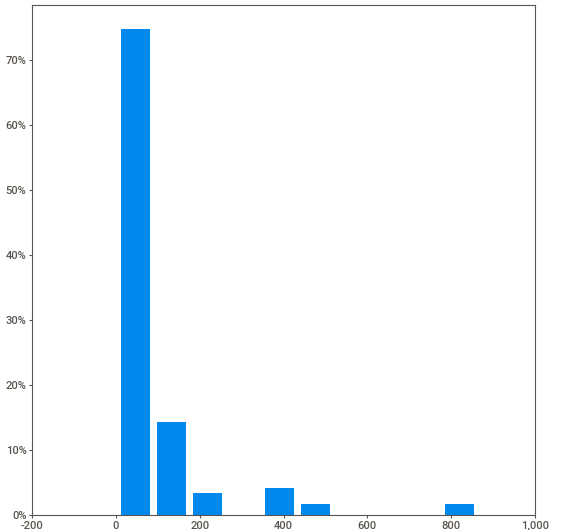
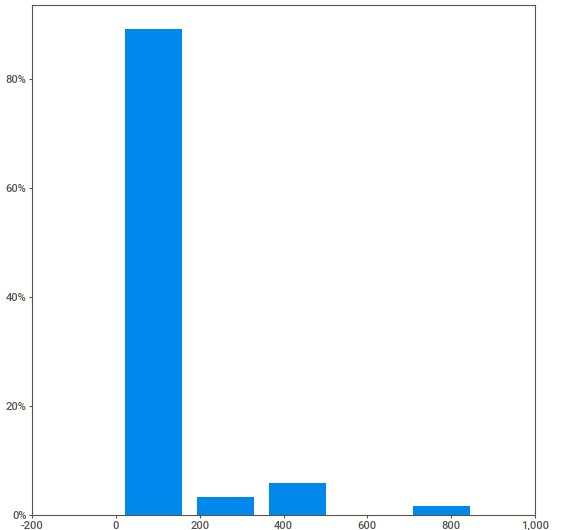
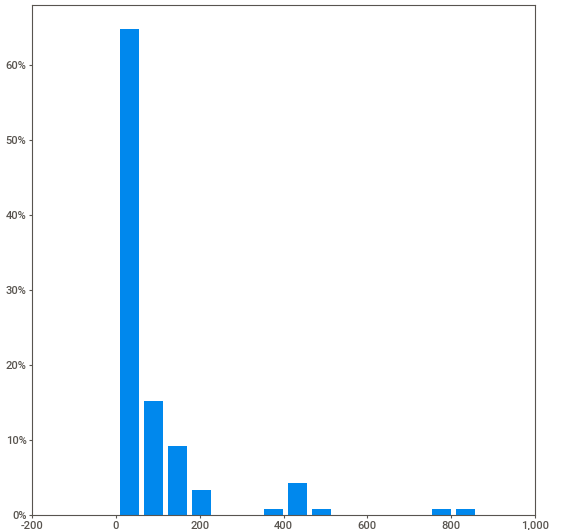
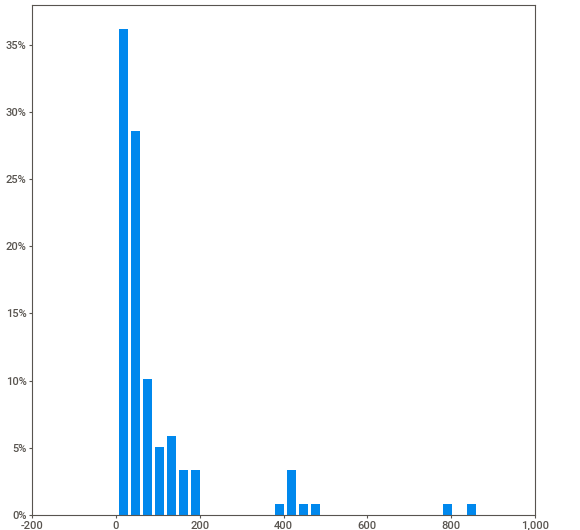
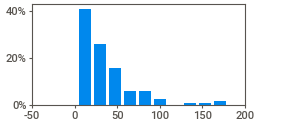
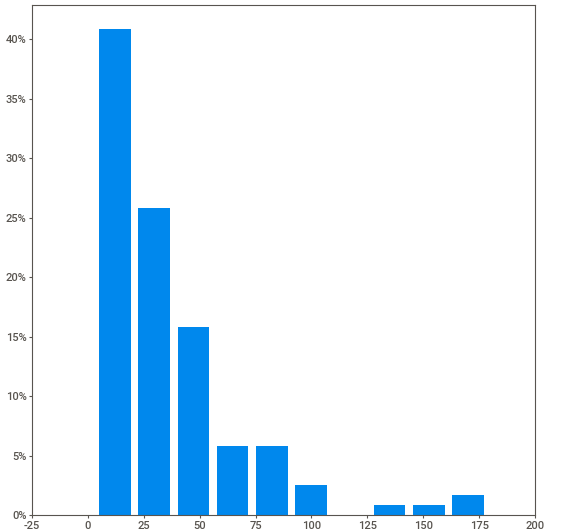
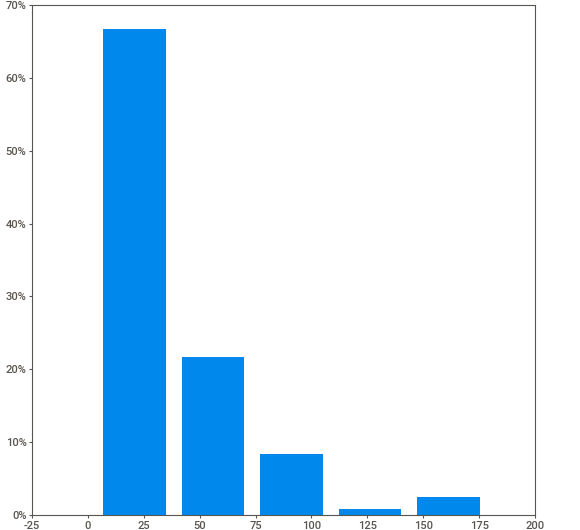
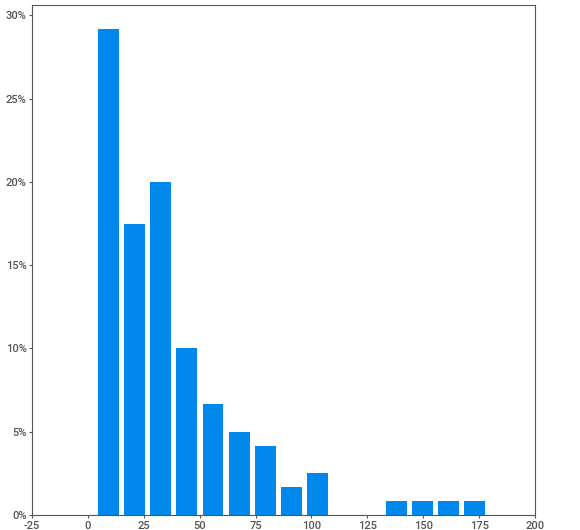
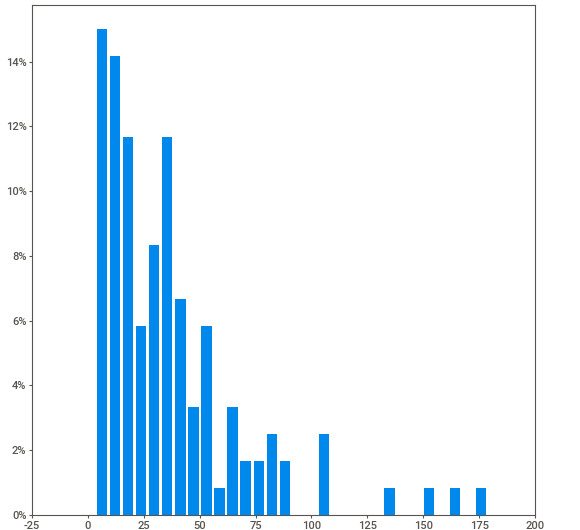
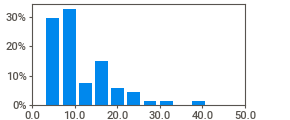
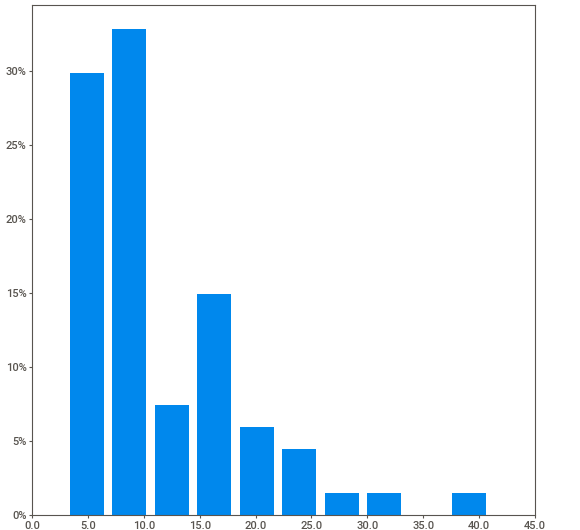
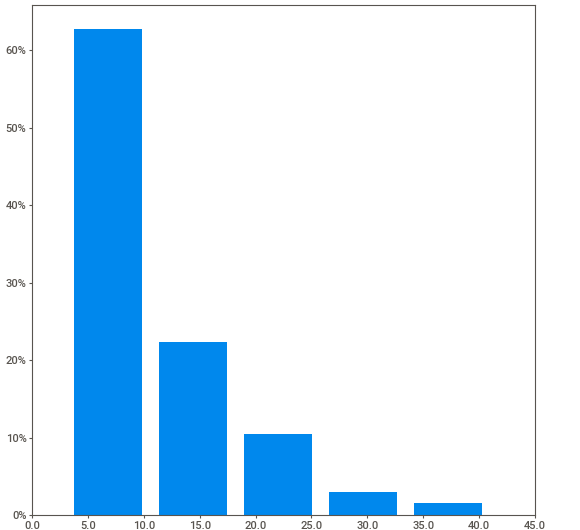
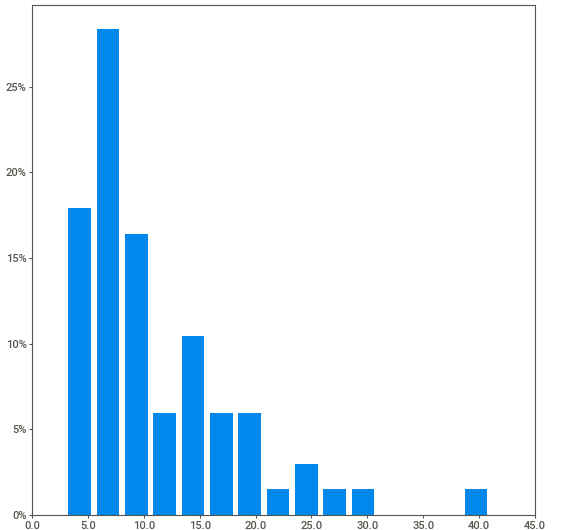
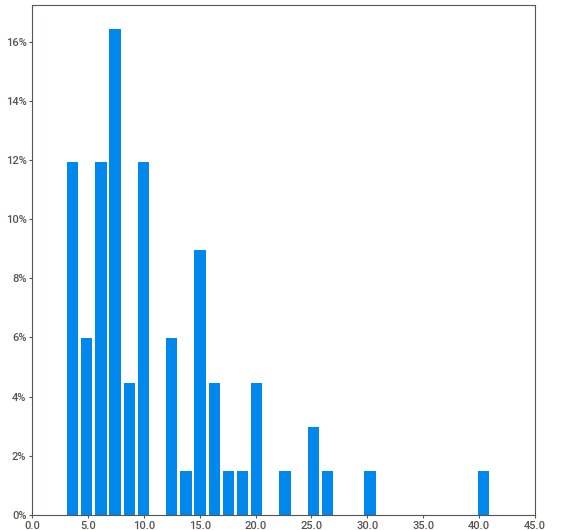
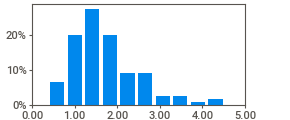
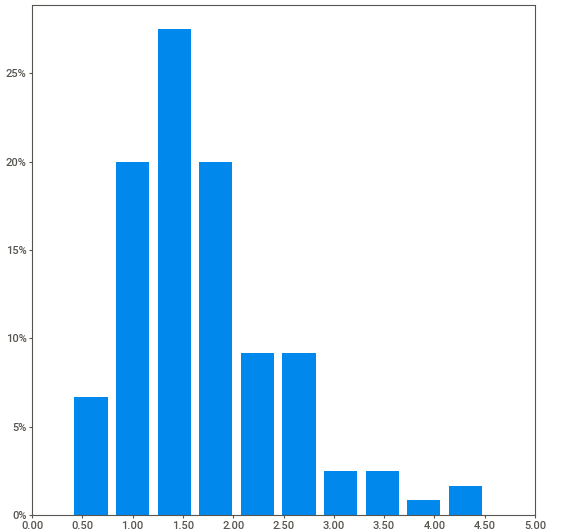
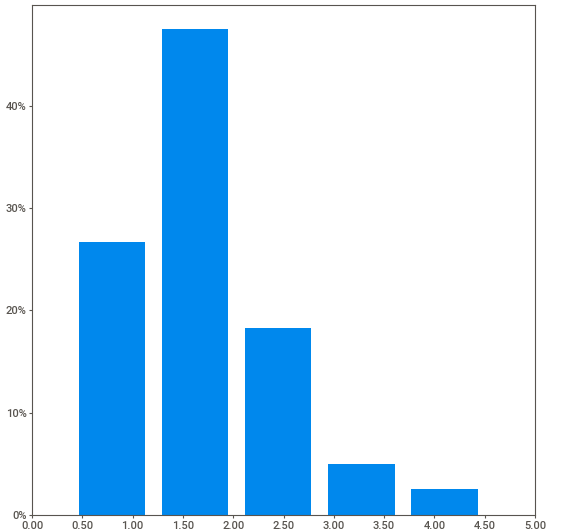
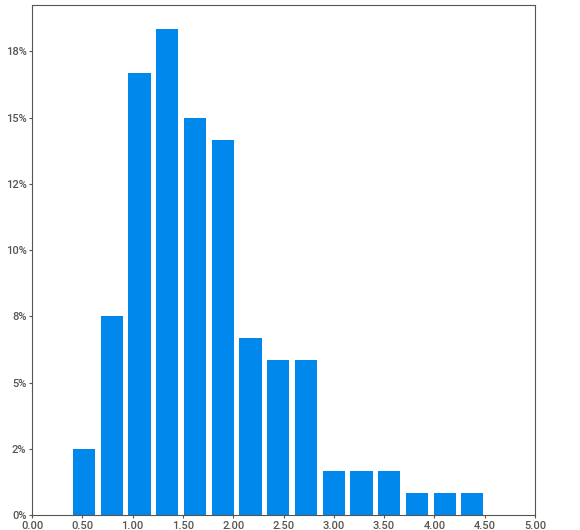
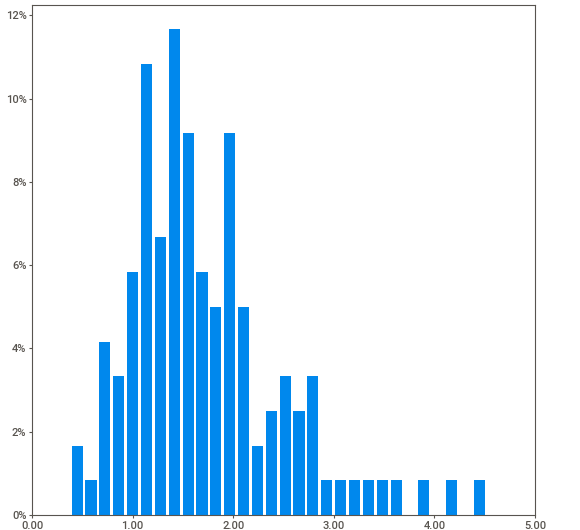
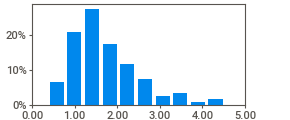
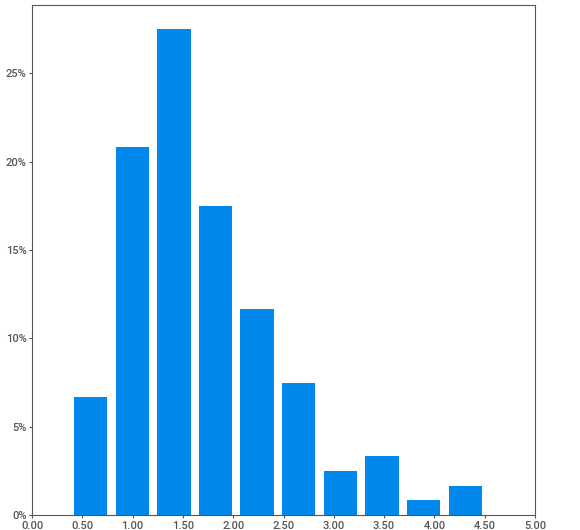
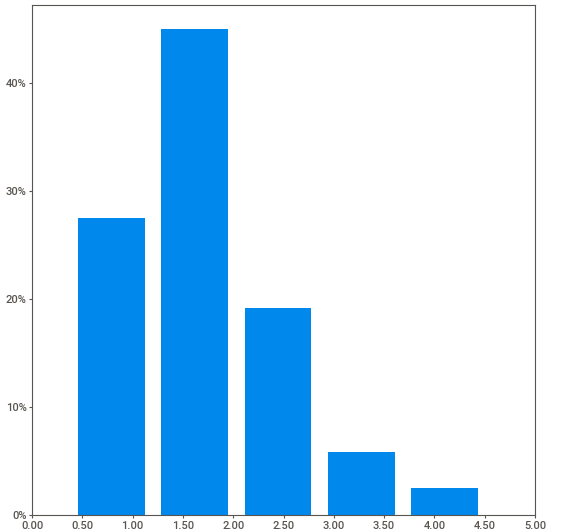
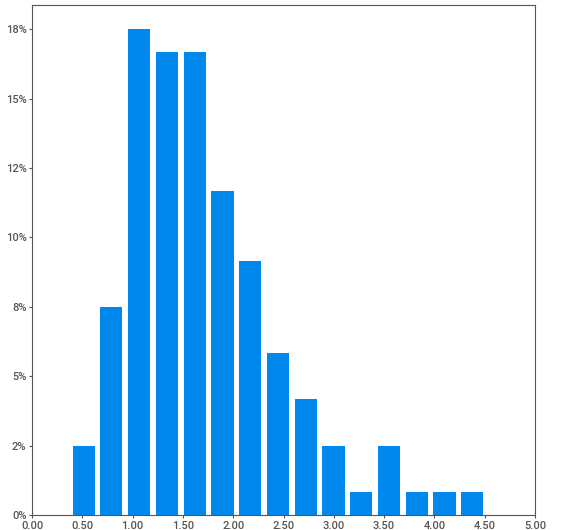
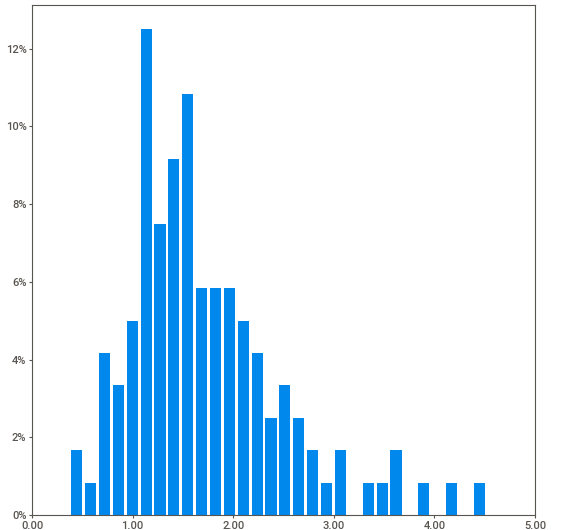
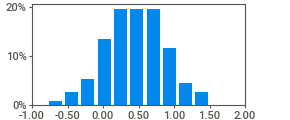
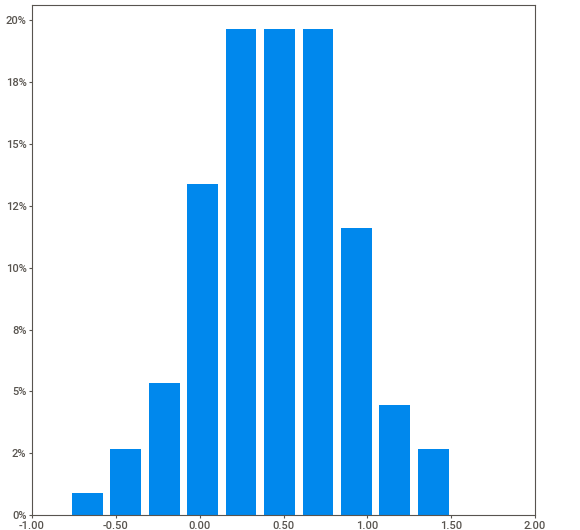
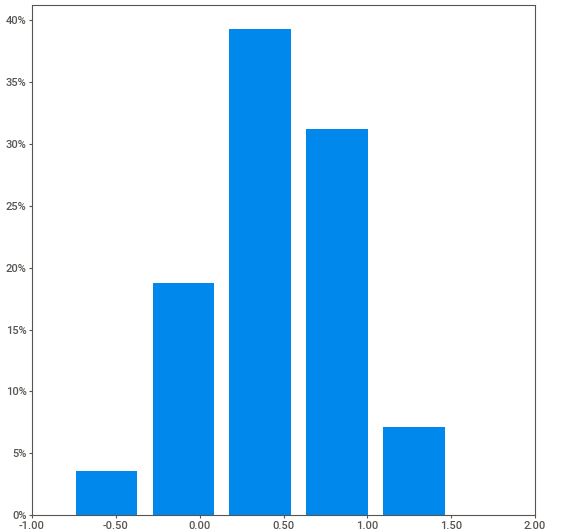
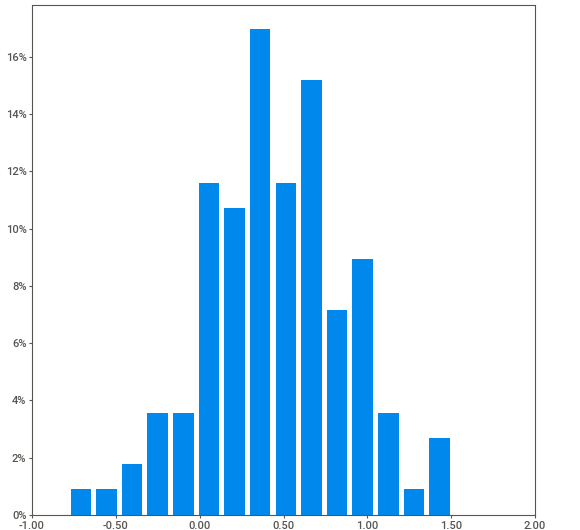
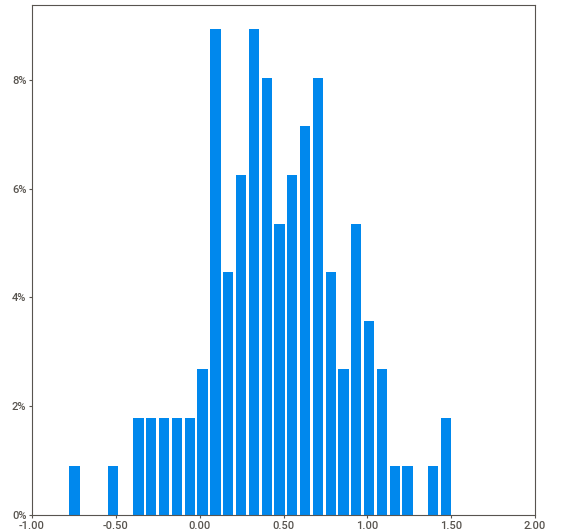
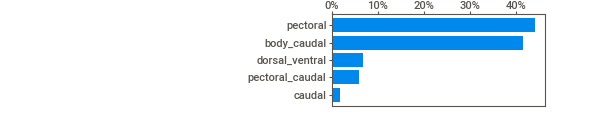
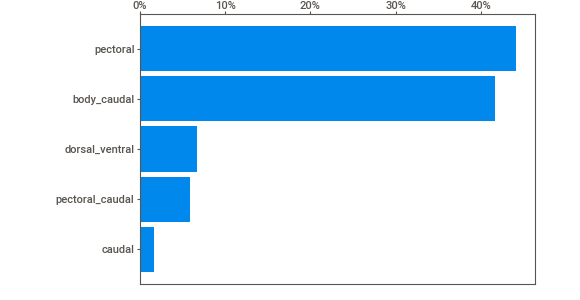
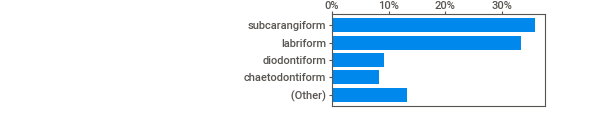
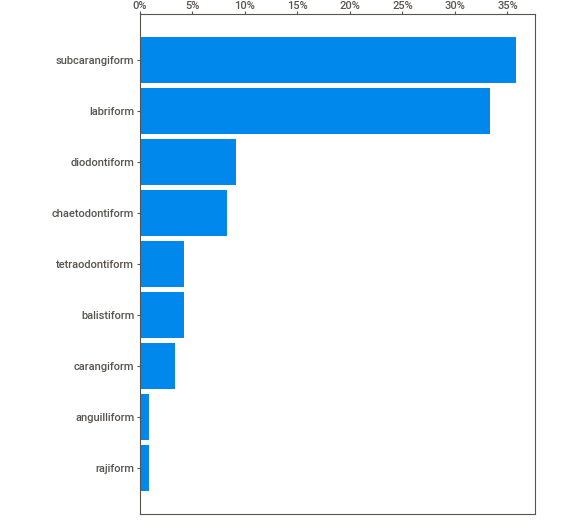
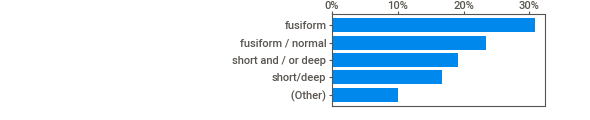
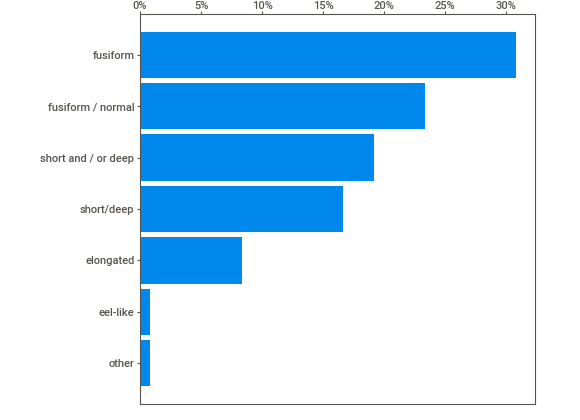
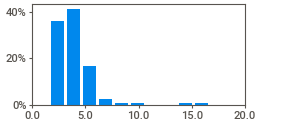
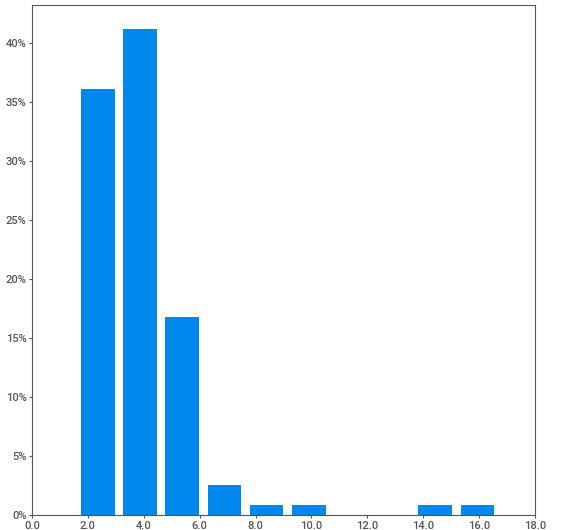
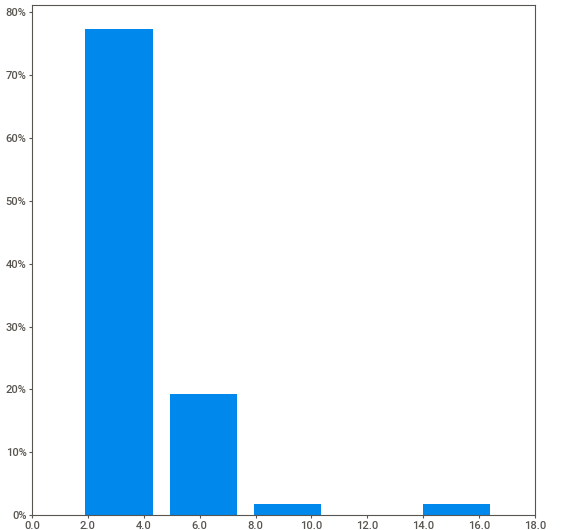
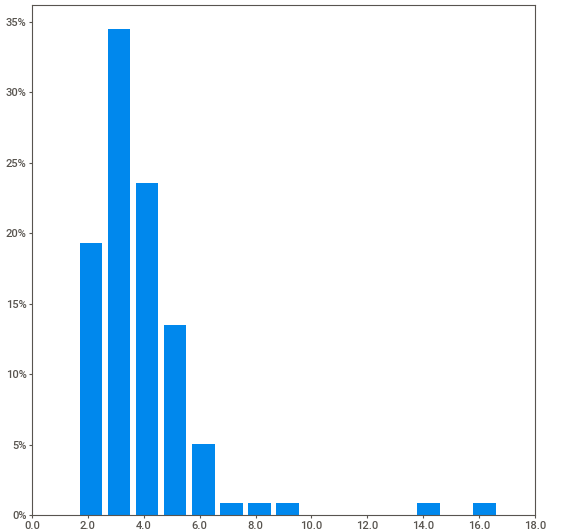
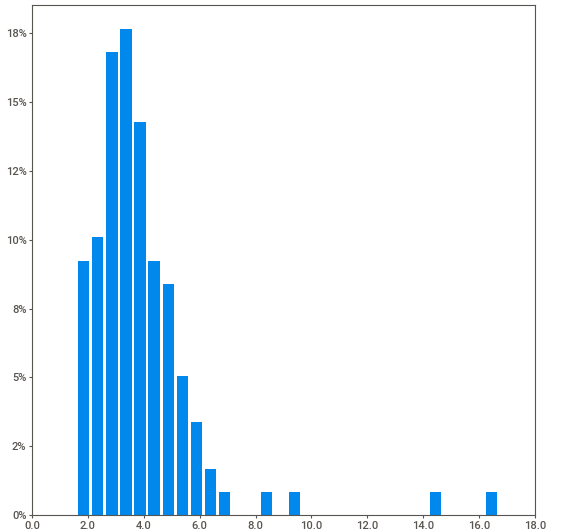
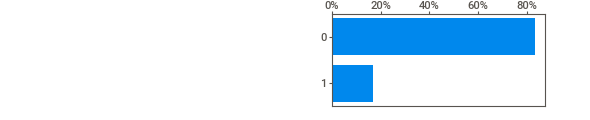
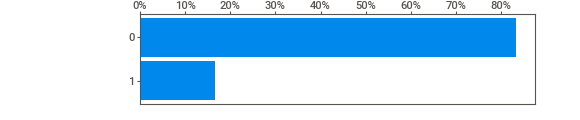
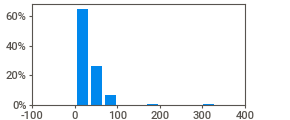
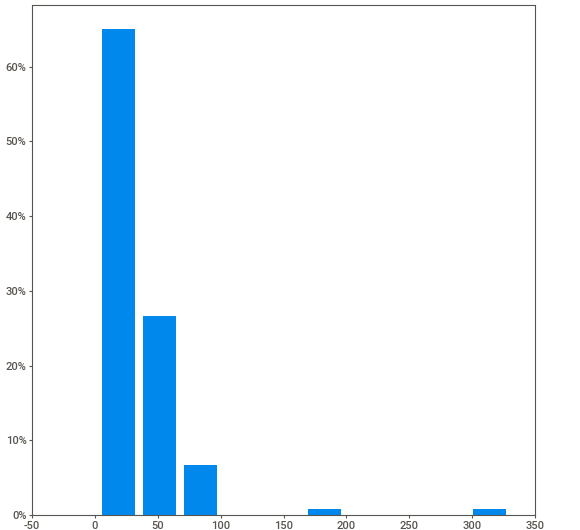
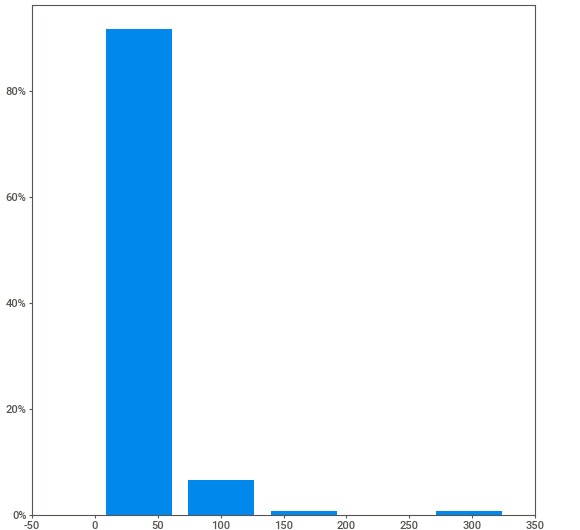
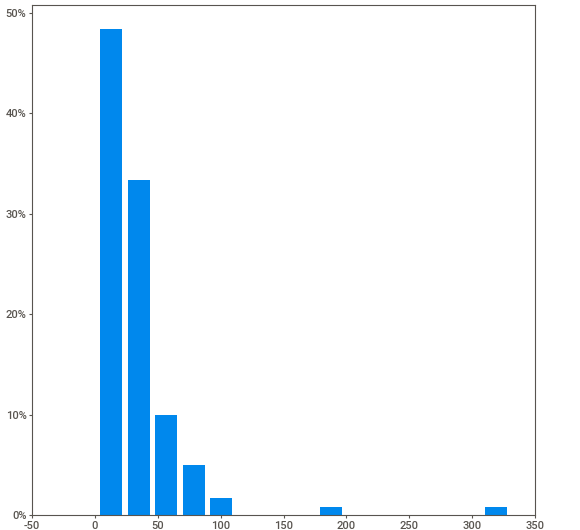
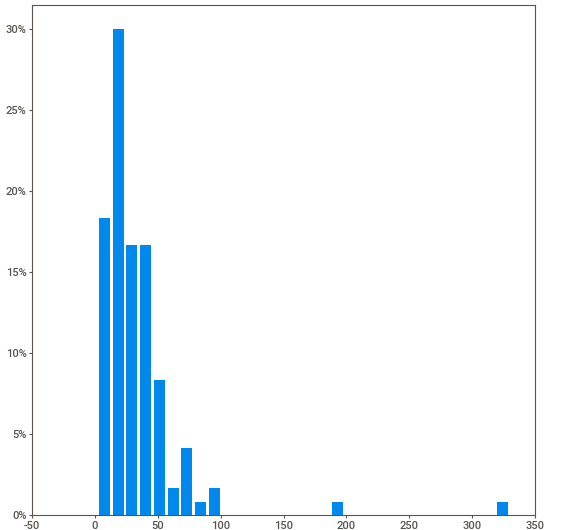
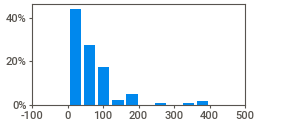
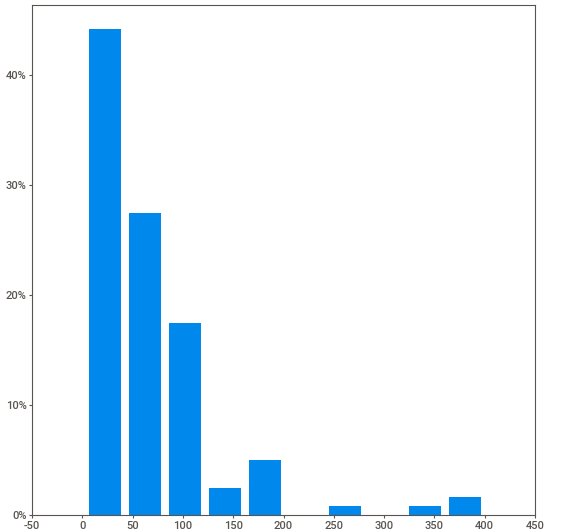
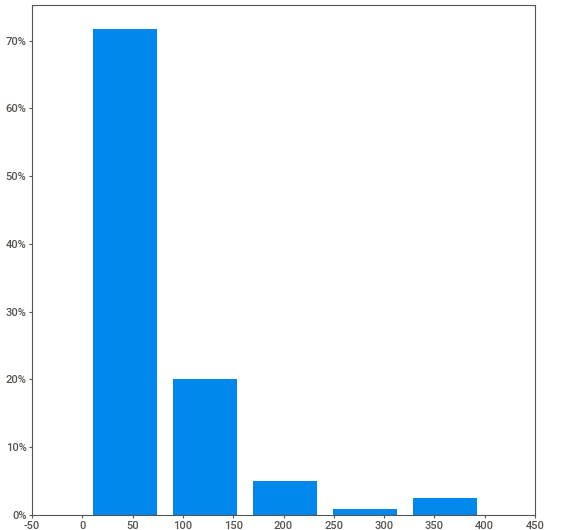
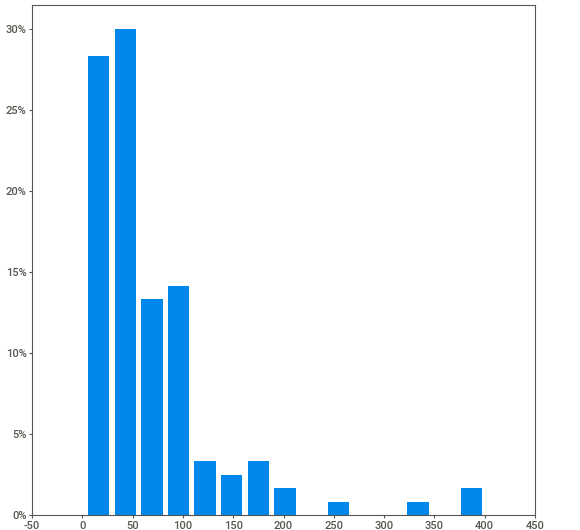
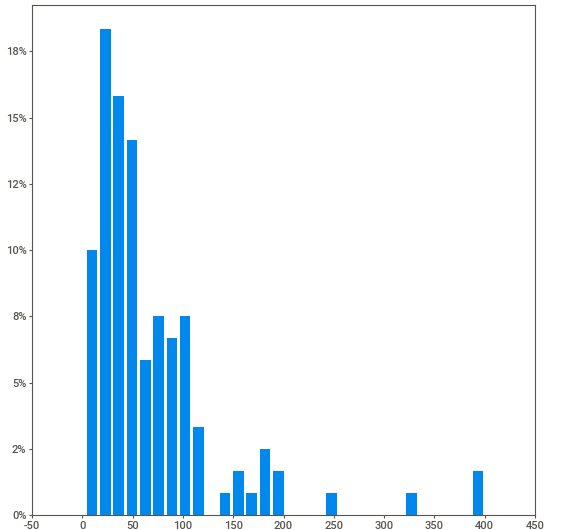
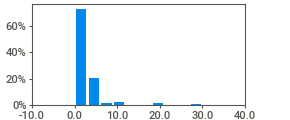
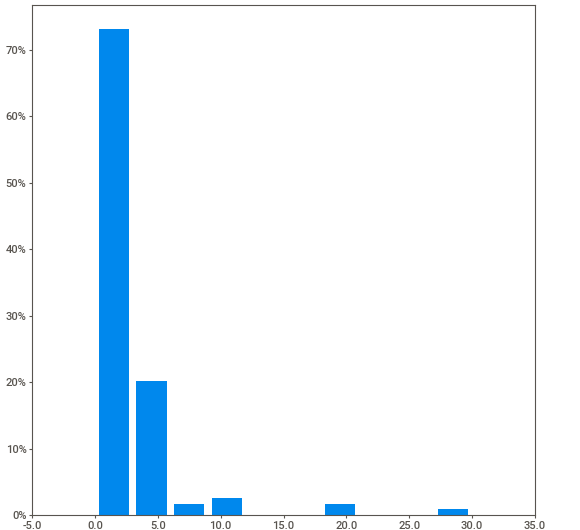
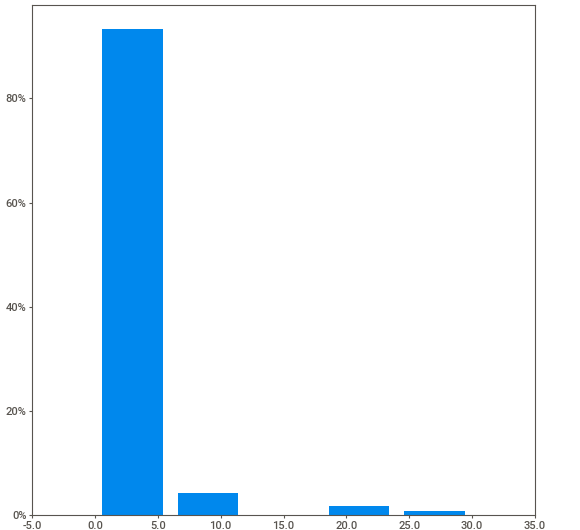
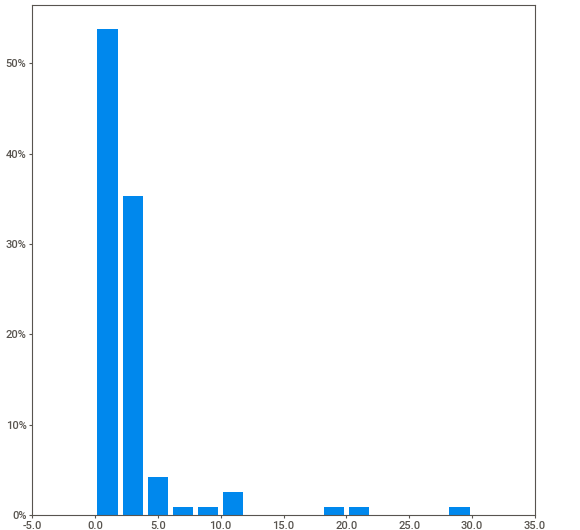
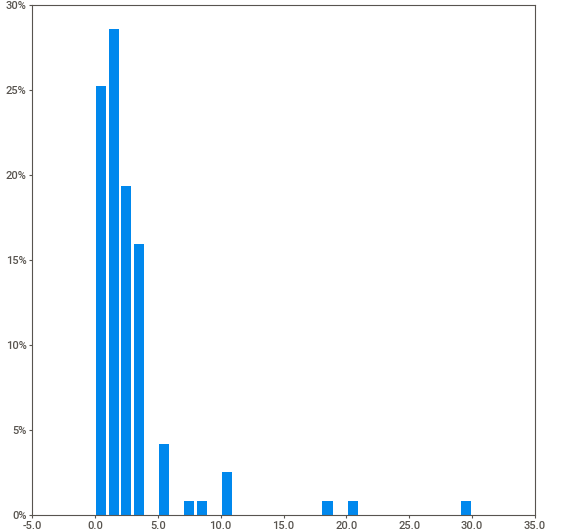
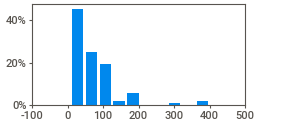
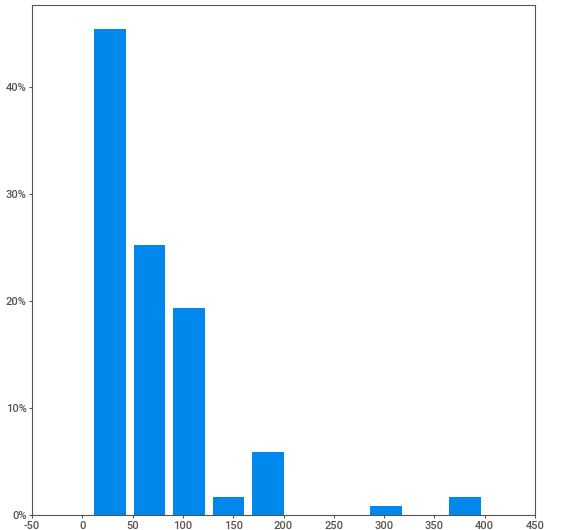
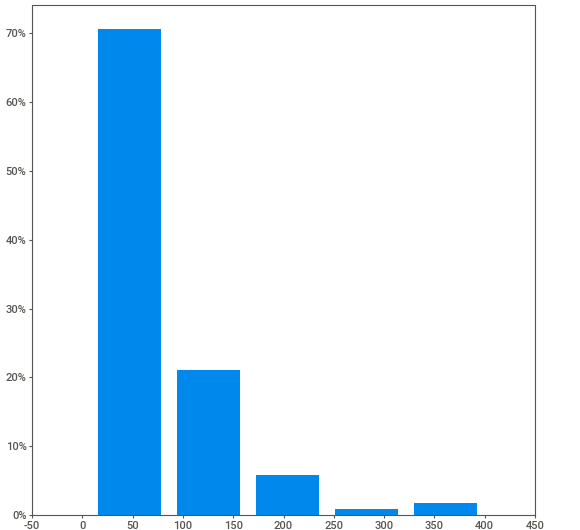
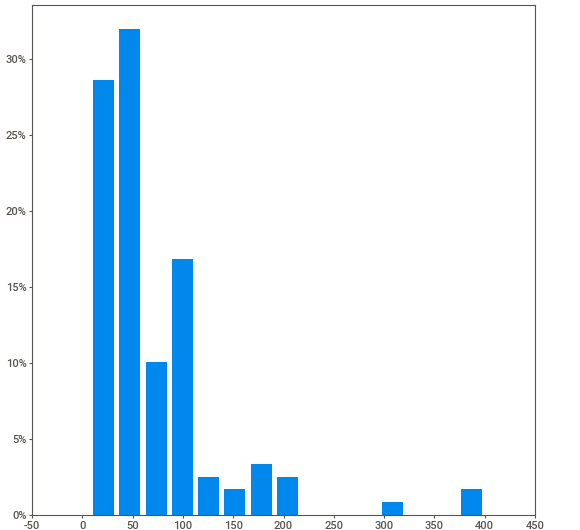
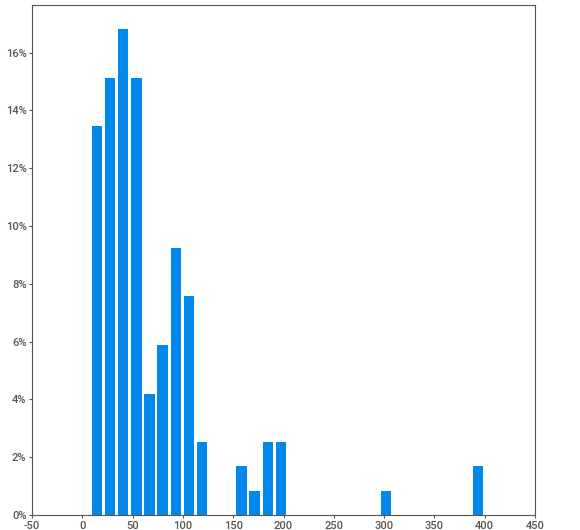
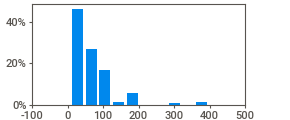
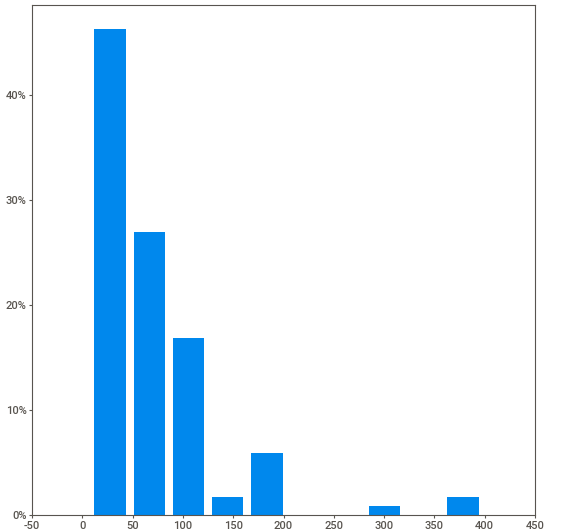
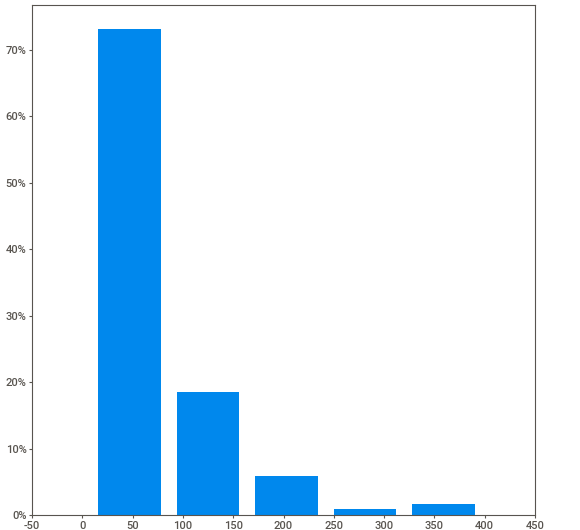
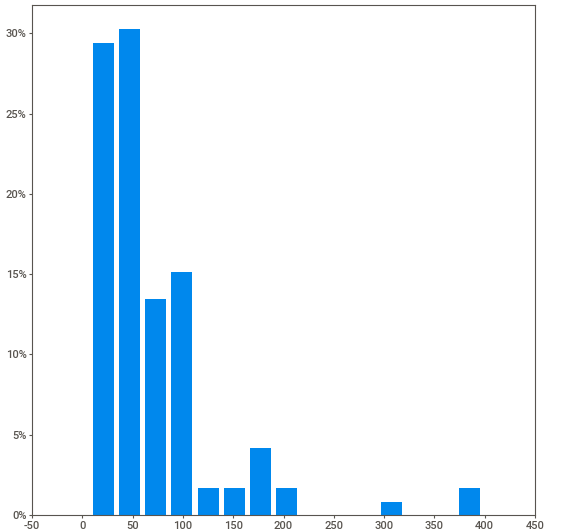
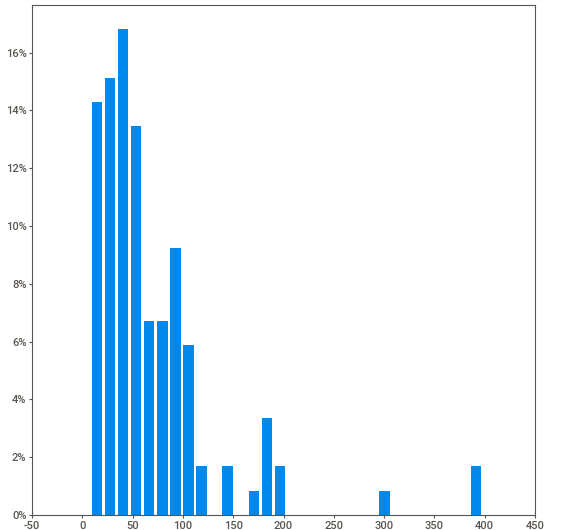
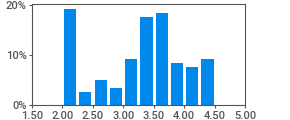
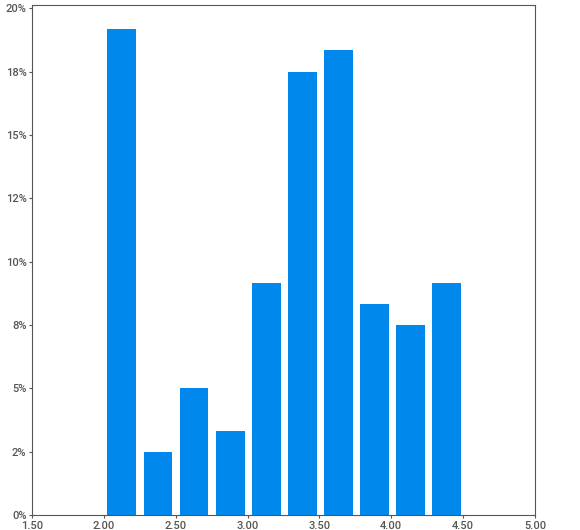
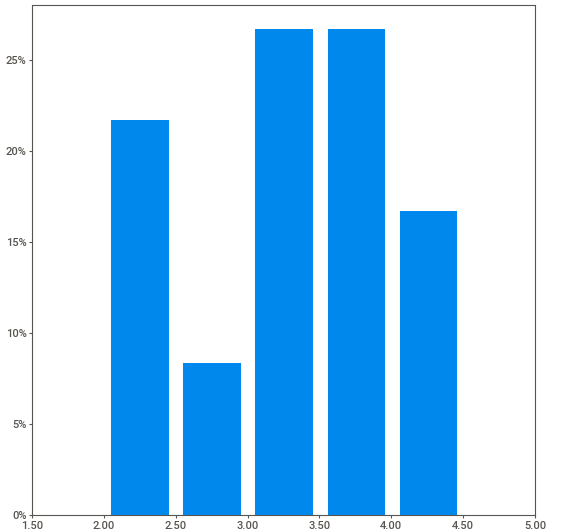
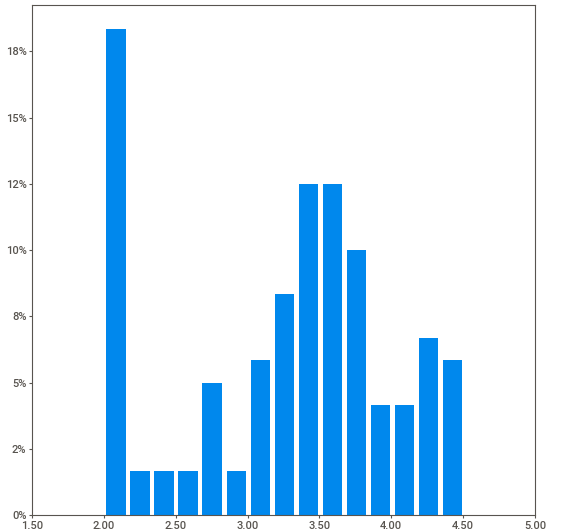
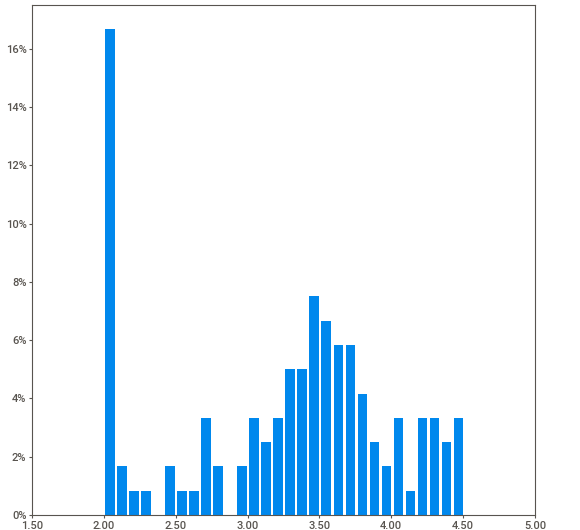
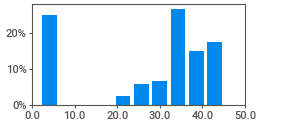
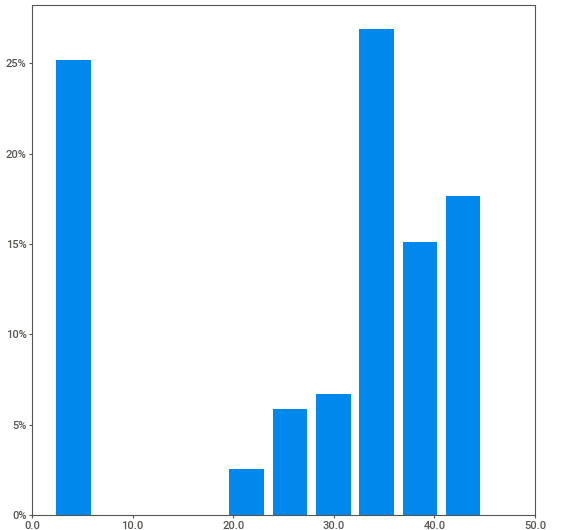
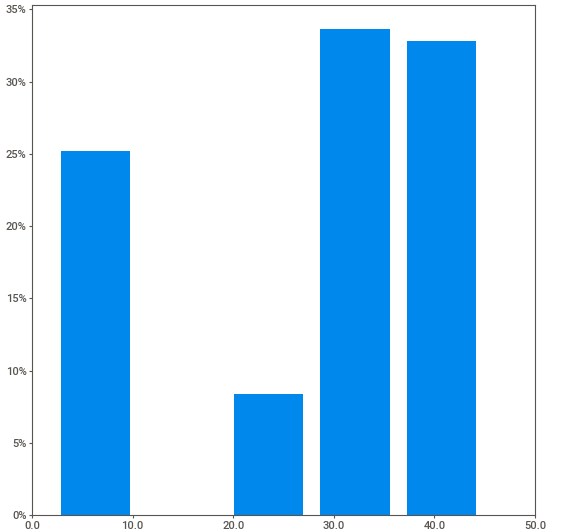
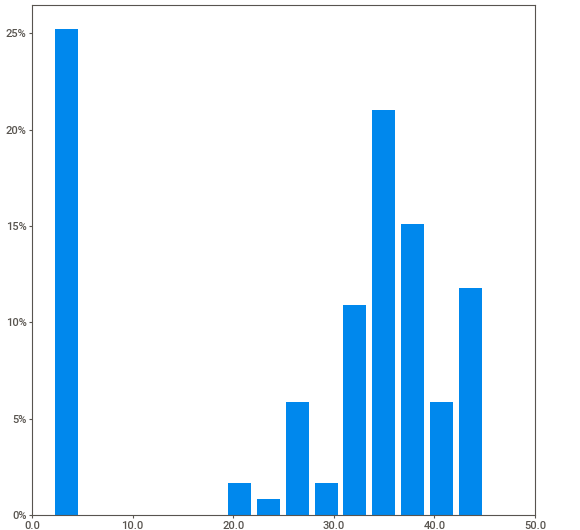
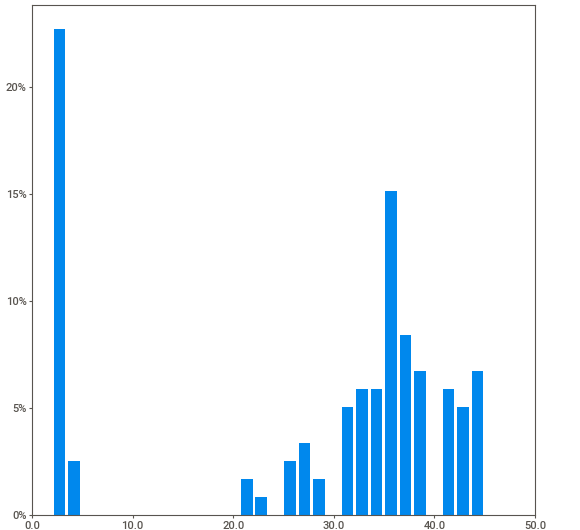
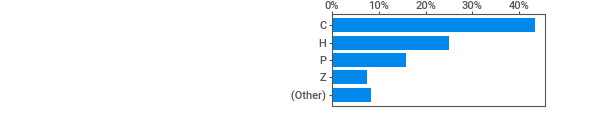
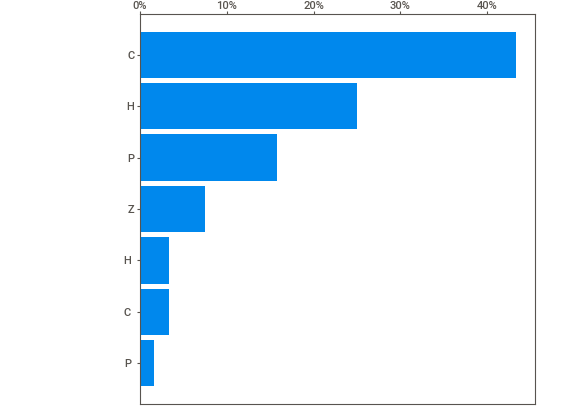
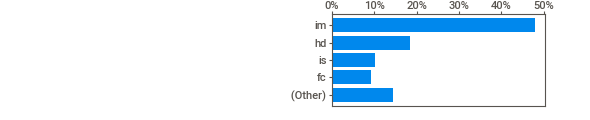
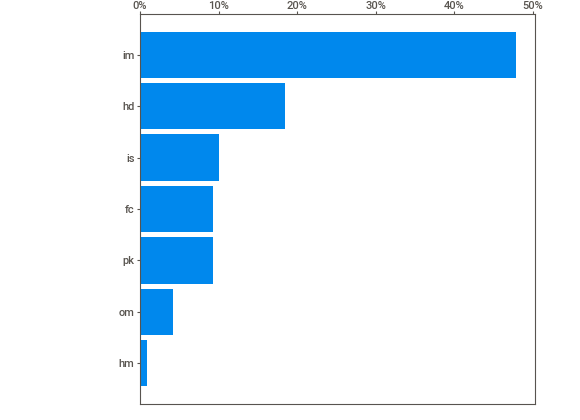
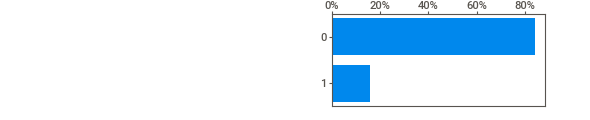
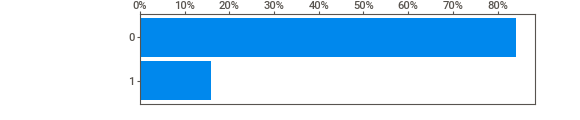
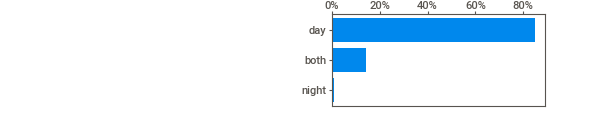
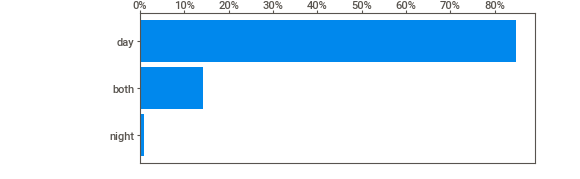
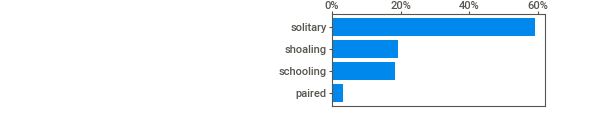
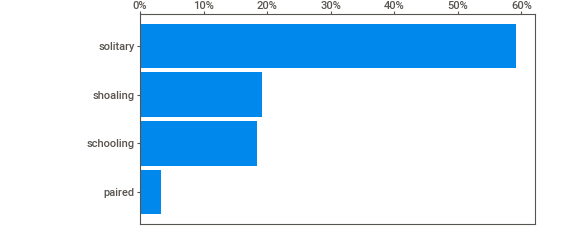
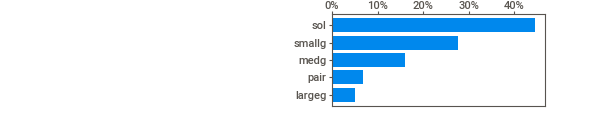
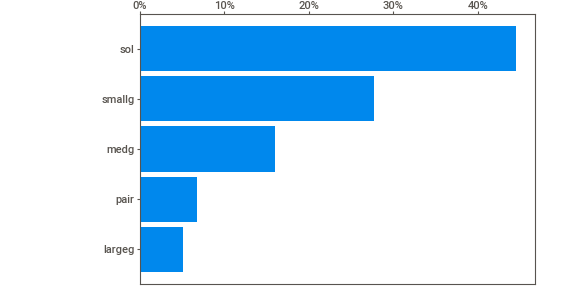
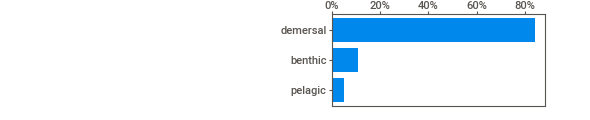
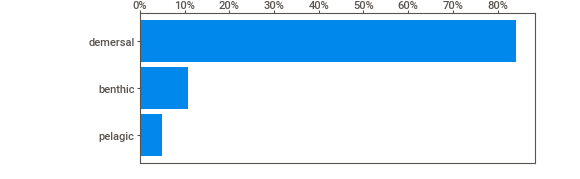
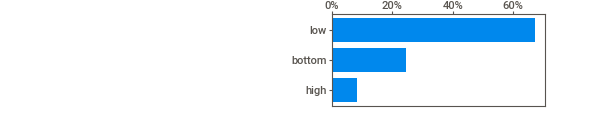
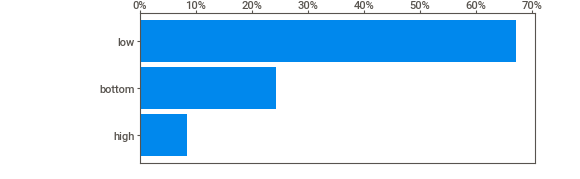
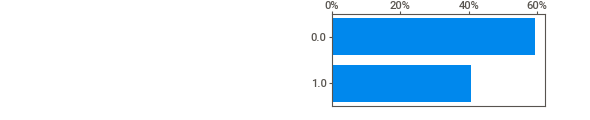
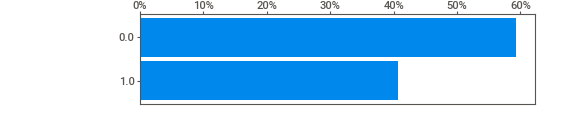
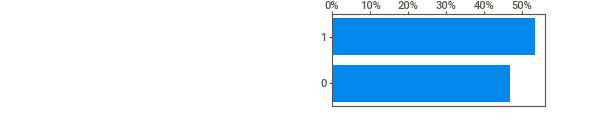
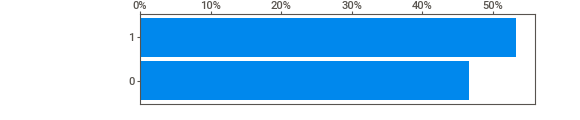
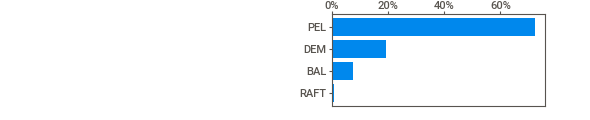
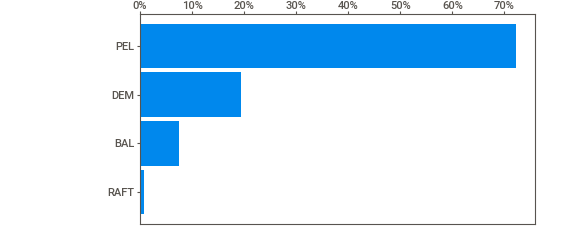
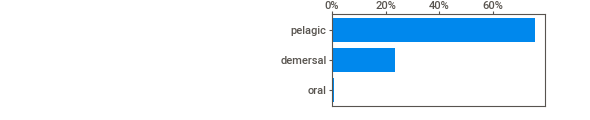
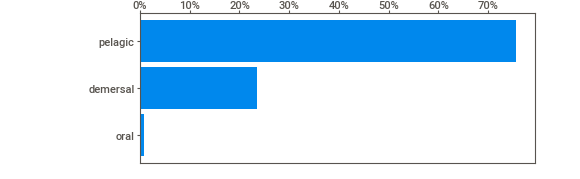
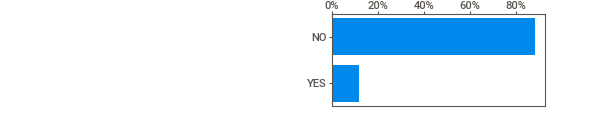
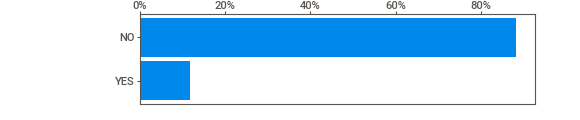
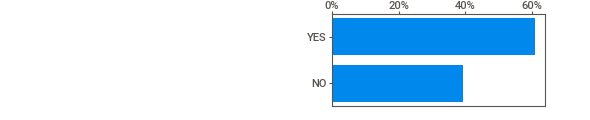
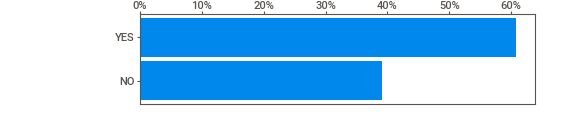
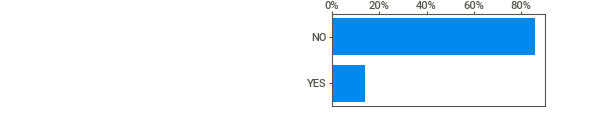
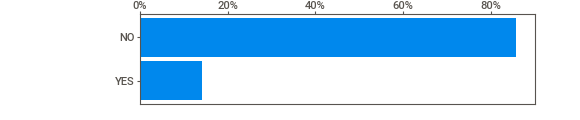
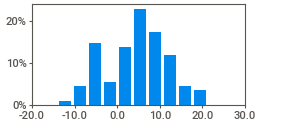
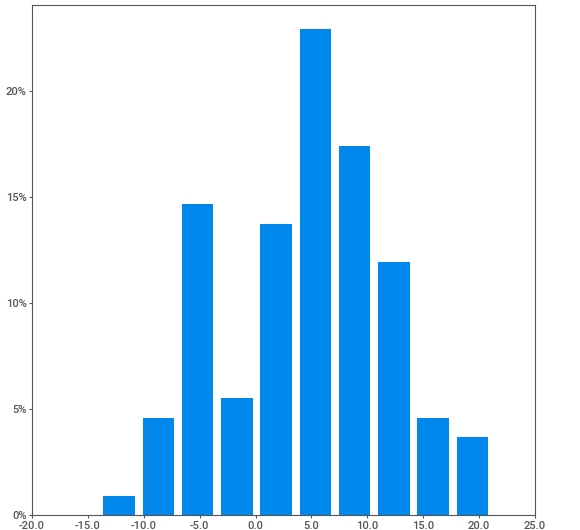
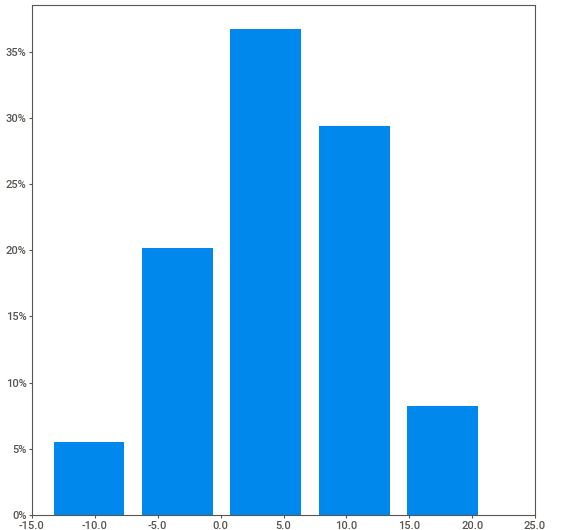
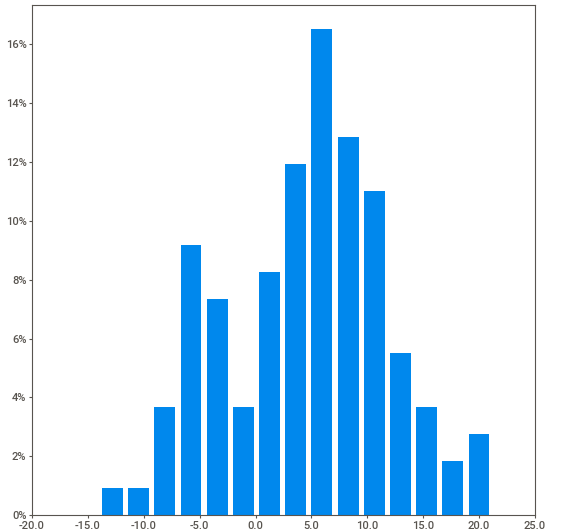
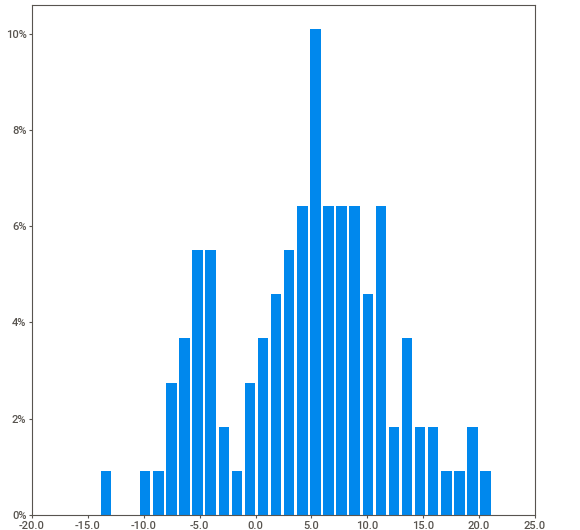
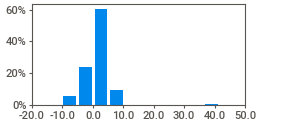
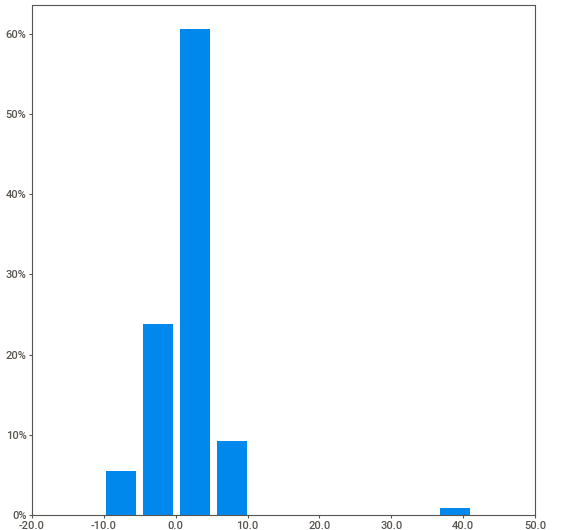
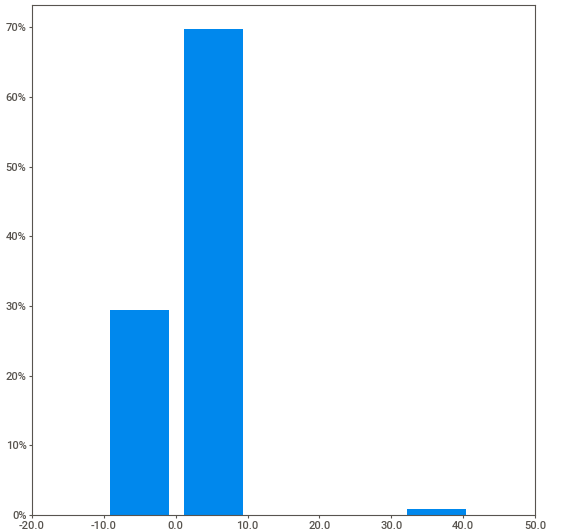
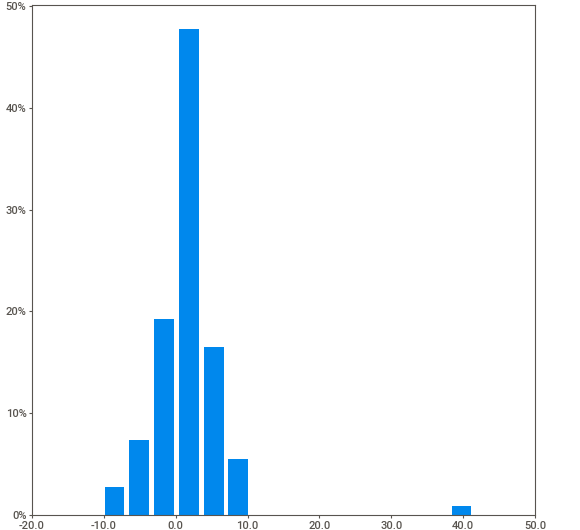
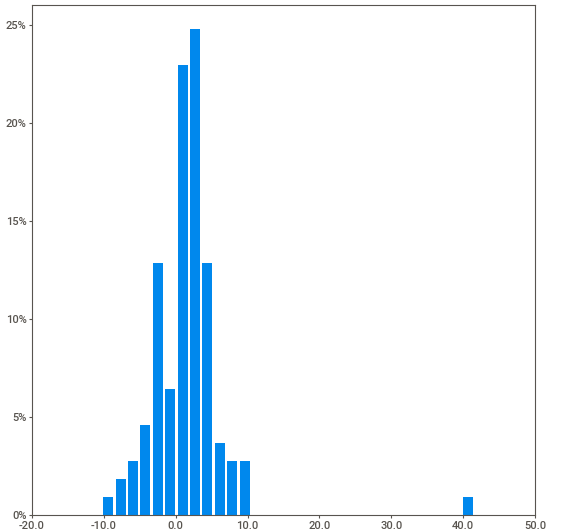
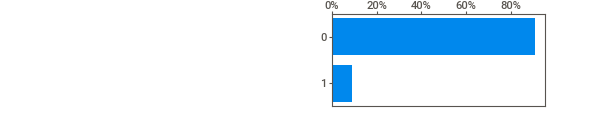
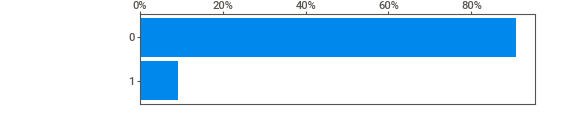
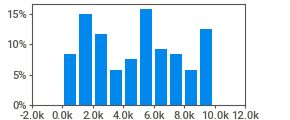
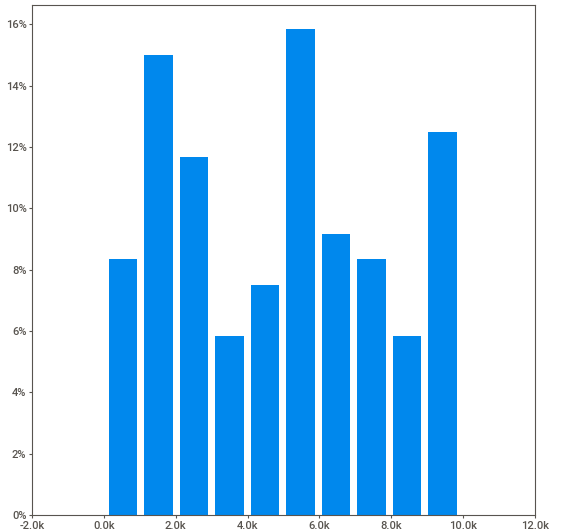
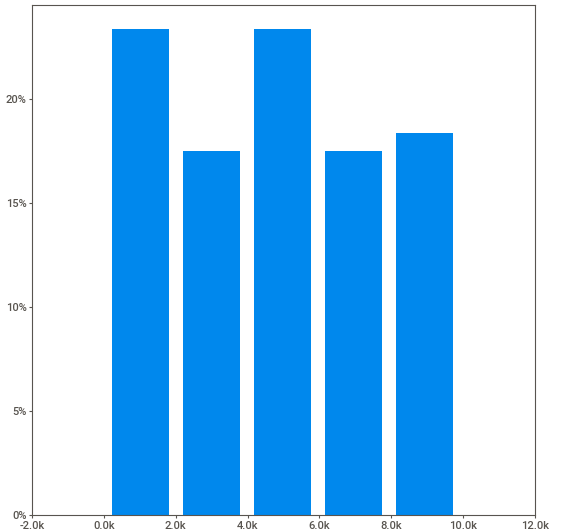
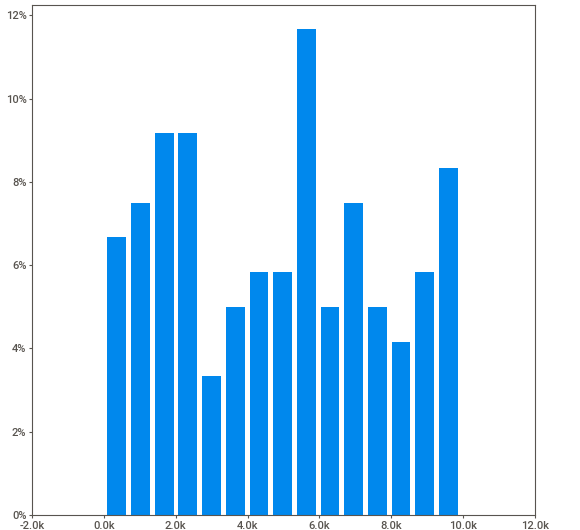
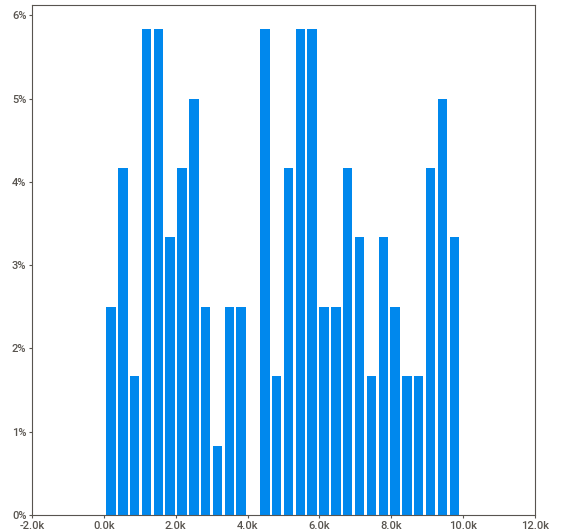
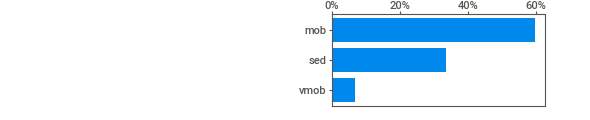
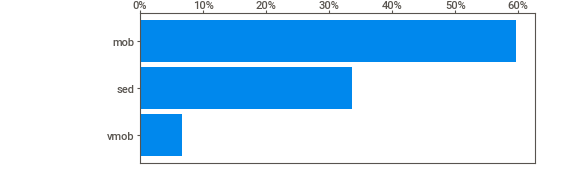
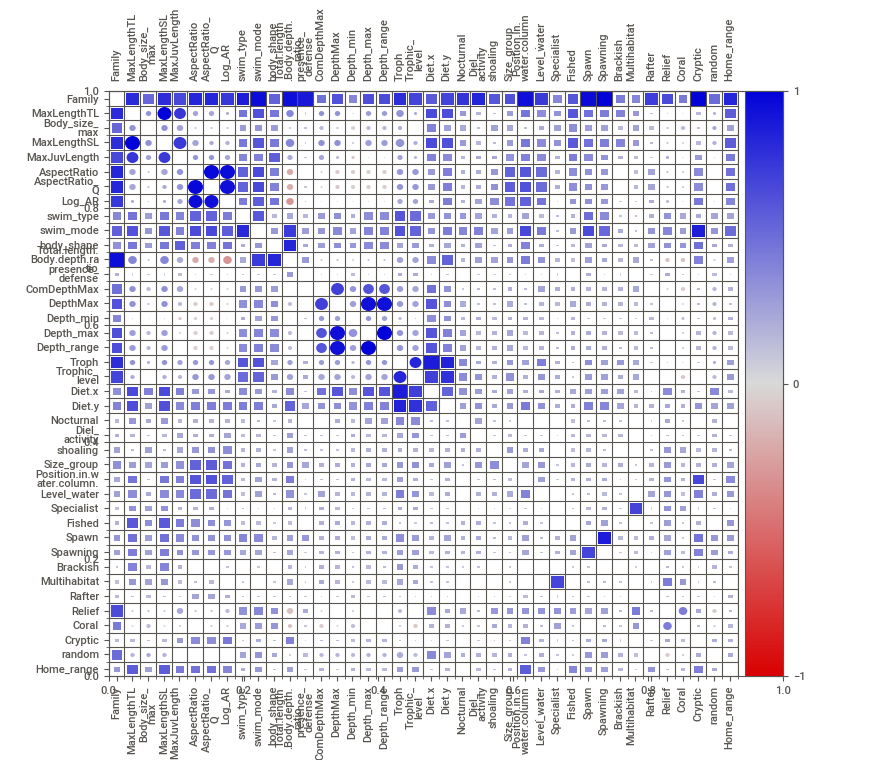
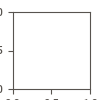

In [12]:
#let's have some insights before plotting our features!

report=sv.analyze(trait)
report.show_notebook()

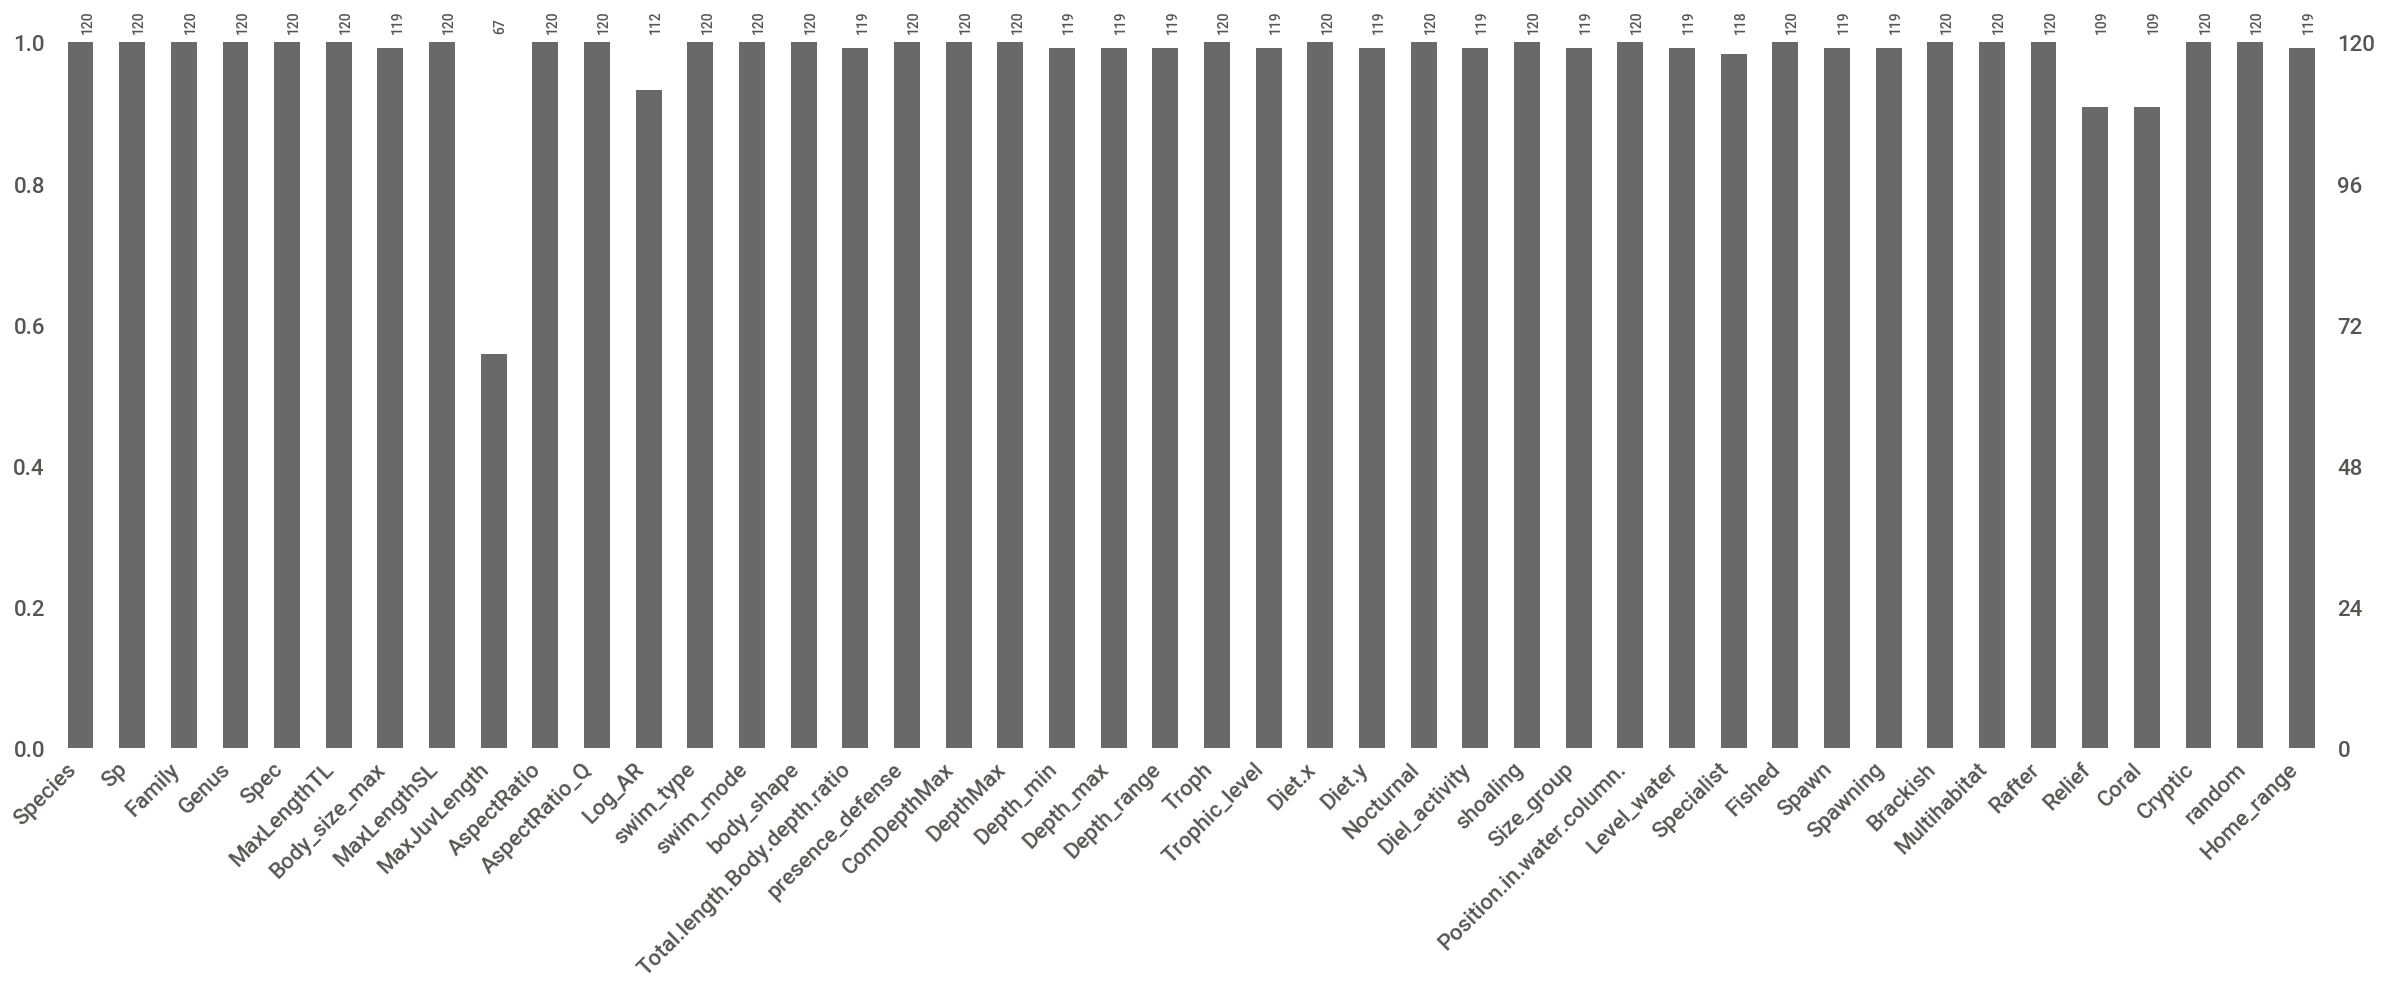

In [13]:
msno.bar(trait)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


==> The bar plot indicates that there are relatively few missing values in the dataset. Specifically, only four columns : MaxJuvLength, Log_AR, relief, and coral have missing values, with 67, 112, 109, and 109 missing values, respectively. (other columns having only one or two missing values)
This level of missing data is considered manageable and can be addressed using standard techniques.

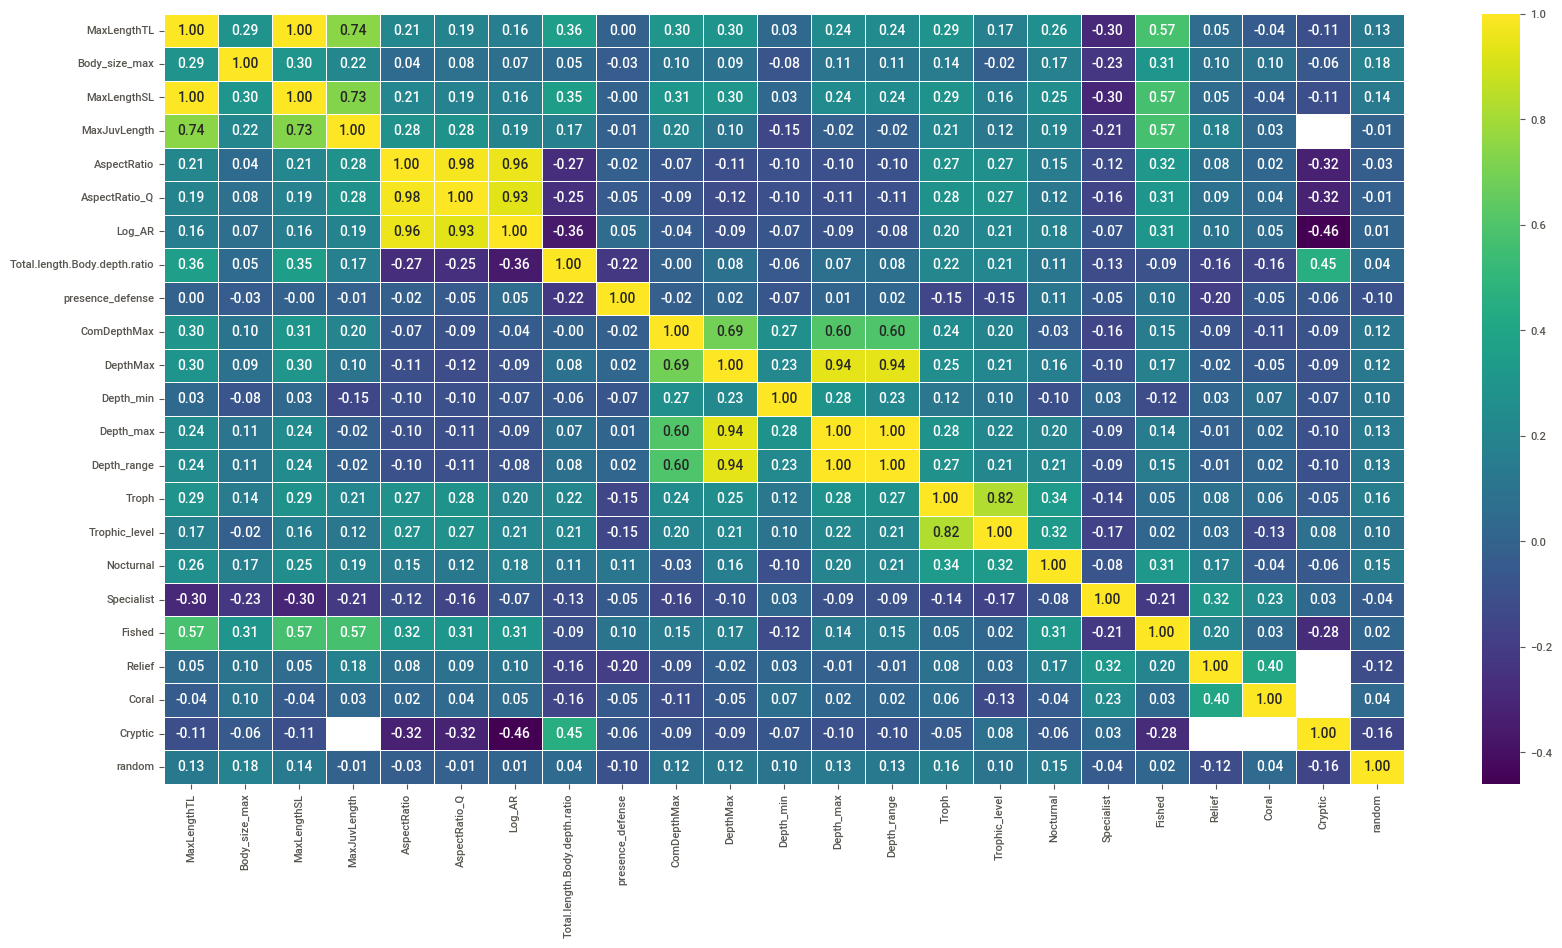

In [14]:
#let's plot numerical data now! how? heatmap is the key!

numerical=trait.select_dtypes(include=np.number)
corr=numerical.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", cbar=True,linewidths=.5)
plt.show()

fished:maxlengthSL, maxJuvlength (maxlength juv and maxlegthsl correlated in southflorida, weak correlation between fished nocturnal.
variables of aspect ratio of the caudal fin are highly correlated almost 1 so it's better to keep just one of them since they serve the same purpose.
depth variables highly correlated better keep the most sgnificant ones to avoid redunduncy.
specialist/relief : weak correlation.

cryptic and total length body ratio log AR of caudal fin are negatively correlated (-045) not strong link though.
heatmap don't allow to have meaningful insight , we have to group and plot the categorical and numerical data all together.

In [15]:
numerical.isna().sum()

MaxLengthTL                       0
Body_size_max                     1
MaxLengthSL                       0
MaxJuvLength                     53
AspectRatio                       0
AspectRatio_Q                     0
Log_AR                            8
Total.length.Body.depth.ratio     1
presence_defense                  0
ComDepthMax                       0
DepthMax                          0
Depth_min                         1
Depth_max                         1
Depth_range                       1
Troph                             0
Trophic_level                     1
Nocturnal                         0
Specialist                        2
Fished                            0
Relief                           11
Coral                            11
Cryptic                           0
random                            0
dtype: int64

In [116]:
#plot time, shall we delve deeper?

biological_data = trait[['Family', 'Species', 'MaxLengthSL', 'AspectRatio_Q', 'swim_mode', 'swim_type']]

In [17]:
biological_data

Family                       Species  MaxLengthSL  Body_size_max  \
0    POMACENTRIDAE           Abudefduf saxatilis        16.82           23.0   
1      OSTRACIIDAE  Acanthostracion quadricornis        45.10           55.0   
2      OSTRACIIDAE    Acanthostracion polygonius        41.00           50.0   
3     ACANTHURIDAE           Acanthurus bahianus        38.10          381.0   
4     ACANTHURIDAE          Acanthurus chirurgus        31.98           39.0   
..             ...                           ...          ...            ...   
115  POMACENTRIDAE          Stegastes planifrons         9.10           13.0   
116  POMACENTRIDAE          Stegastes variabilis         9.96          125.0   
117       LABRIDAE        Thalassoma bifasciatum        20.50           25.0   
118  UROTRYGONIDAE          Urobatis jamaicensis        62.32            NaN   
119       LABRIDAE           Xyrichtys splendens        14.35          175.0   

           swim_mode        swim_type  
0          labriform         pectoral  
1    tetraodontiform   dorsal_ventral  
2    tetraodontiform   dorsal_ventral  
3          labriform         pectoral  
4          labriform         pectoral  
..               ...              ...  
115  chaetodontiform  pectoral_caudal  
116  chaetodontiform  pectoral_caudal  
117        labriform         pectoral  
118         rajiform         pectoral  
119        labriform      body_caudal  

[120 rows x 6 columns]

In [175]:
family_grouped_data = trait.groupby('Family')[['MaxLengthSL','Body_size_max']].mean().reset_index()
grouped_data=grouped_data.sort_values(by=['MaxLengthSL'],ascending=False)
print(grouped_data)

             Family  MaxLengthSL  Body_size_max
27     SPHYRAENIDAE   178.880000     200.000000
17       MURAENIDAE   164.000000     200.000000
23      SCOMBERIDAE   150.060000     183.000000
1      AULOSTOMIDAE    82.000000     100.000000
14    MALACANTHIDAE    70.000000      70.000000
4        CARANGIDAE    64.346667      81.000000
13       LUTJANIDAE    63.063333     324.166667
29    UROTRYGONIDAE    62.320000            NaN
10       KYPHOSIDAE    62.320000      76.000000
2        BALISTIDAE    52.960000      60.000000
6       DIODONTIDAE    43.240000      50.000000
26         SPARIDAE    42.905000      51.000000
19      OSTRACIIDAE    41.873333      50.666667
9     HOLOCENTRIDAE    39.360000      48.000000
15    MONACANTHIDAE    38.266667      46.666667
20    POMACANTHIDAE    37.644000     119.200000
25       SERRANIDAE    37.620667     100.600000
11         LABRIDAE    37.266250      76.250000
0      ACANTHURIDAE    34.020000     153.000000
8        HAEMULIDAE    33.247273     107

In [114]:
trait['swim_mode'].value_counts()

swim_mode
subcarangiform     43
labriform          40
diodontiform       11
chaetodontiform    10
tetraodontiform     5
balistiform         5
carangiform         4
anguilliform        1
rajiform            1
Name: count, dtype: int64

In [115]:
trait['swim_type'].value_counts()

swim_type
pectoral           53
body_caudal        50
dorsal_ventral      8
pectoral_caudal     7
caudal              2
Name: count, dtype: int64

#### ==> The predominant values for the feature : "swim_type" are as follows: pectoral (53) and body_caudal (50).
#### ==> The predominant values for the feature : "swim_mode" are as follows: subcarangiform (43) and labriform (50).


In [54]:
swimMode_grouped_data = trait.groupby('swim_mode')[['MaxLengthSL','Body_size_max']].mean().reset_index()
swimMode_grouped_data=swimMode_grouped_data.sort_values(by=['MaxLengthSL'],ascending=False)
print(swimMode_grouped_data)

         swim_mode  MaxLengthSL  Body_size_max
0     anguilliform   164.000000     200.000000
2      carangiform    85.775000     106.500000
6         rajiform    62.320000            NaN
1      balistiform    49.952000      60.000000
7   subcarangiform    43.182791     132.441860
5        labriform    33.673250      76.750000
8  tetraodontiform    32.012000      38.800000
3  chaetodontiform    10.598000      36.400000
4     diodontiform     9.429091      45.818182


In [55]:
swimType_grouped_data = trait.groupby('swim_type')[['MaxLengthSL','Body_size_max']].mean().reset_index()
swimType_grouped_data=swimType_grouped_data.sort_values(by=['MaxLengthSL'],ascending=False)
print(swimType_grouped_data)

         swim_type  MaxLengthSL  Body_size_max
1           caudal   103.200000     128.000000
0      body_caudal    46.120600     127.740000
2   dorsal_ventral    43.212500      52.125000
3         pectoral    27.535283      64.884615
4  pectoral_caudal    10.747143      45.571429


In [60]:
swim_grouped_data = trait.groupby(['swim_type','swim_mode'])[['MaxLengthSL','Body_size_max']].mean().reset_index()
swim_grouped_data=swim_grouped_data.sort_values(by=['MaxLengthSL'],ascending=False)
print(swim_grouped_data)

          swim_type        swim_mode  MaxLengthSL  Body_size_max
0       body_caudal     anguilliform   164.000000     200.000000
5            caudal      carangiform   103.200000     128.000000
1       body_caudal      carangiform    68.350000      85.000000
11         pectoral         rajiform    62.320000            NaN
6    dorsal_ventral      balistiform    49.952000      60.000000
3       body_caudal   subcarangiform    43.182791     132.441860
2       body_caudal        labriform    42.175000     122.500000
10         pectoral        labriform    33.658378      75.783784
4       body_caudal  tetraodontiform    32.060000      38.500000
7    dorsal_ventral  tetraodontiform    31.980000      39.000000
13  pectoral_caudal        labriform    17.220000      21.000000
8          pectoral  chaetodontiform    11.992500      16.500000
12  pectoral_caudal  chaetodontiform     9.668333      49.666667
9          pectoral     diodontiform     9.429091      45.818182


=> Body caudal is associated with the maximum body size species and relatively greater length, whereas caudal swim type is associated with both the highest maximum length and body size, and is found exclusively in the carangiform swim mode.

=> The most frequent occurrences of swim modes, subcarangiform and labriform, correspond to body_caudal and both pectoral and body_caudal, respectively, which are also the most frequent occurrences of swim types. These observations are associated with relatively low maximum lengths (MaxLengthSL approximately 43 and 33) and predominantly high maximum body sizes (Body_size_max around 132 and 76).

<Figure size 4800x3600 with 0 Axes>

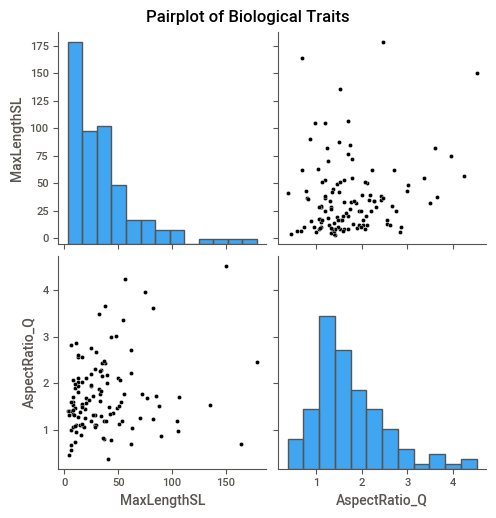

In [117]:
plt.figure(figsize=(16, 12), dpi=300)
sns.pairplot(biological_data,plot_kws={'color': 'black'})
plt.suptitle('Pairplot of Biological Traits',y=1.02)
plt.show()

The aspect ratio of the caudal fin is more associated with lower values of maximum length. This indicates that smaller reef fish tend to have higher aspect ratios of their caudal fins, which may an advantage for maneuverability and efficiency in their complex habitats.
(we can also observe some outliers)

In [19]:
environmental_data = trait[['DepthMax', 'Troph', 'Diet.x', 'Relief', 'Coral']]

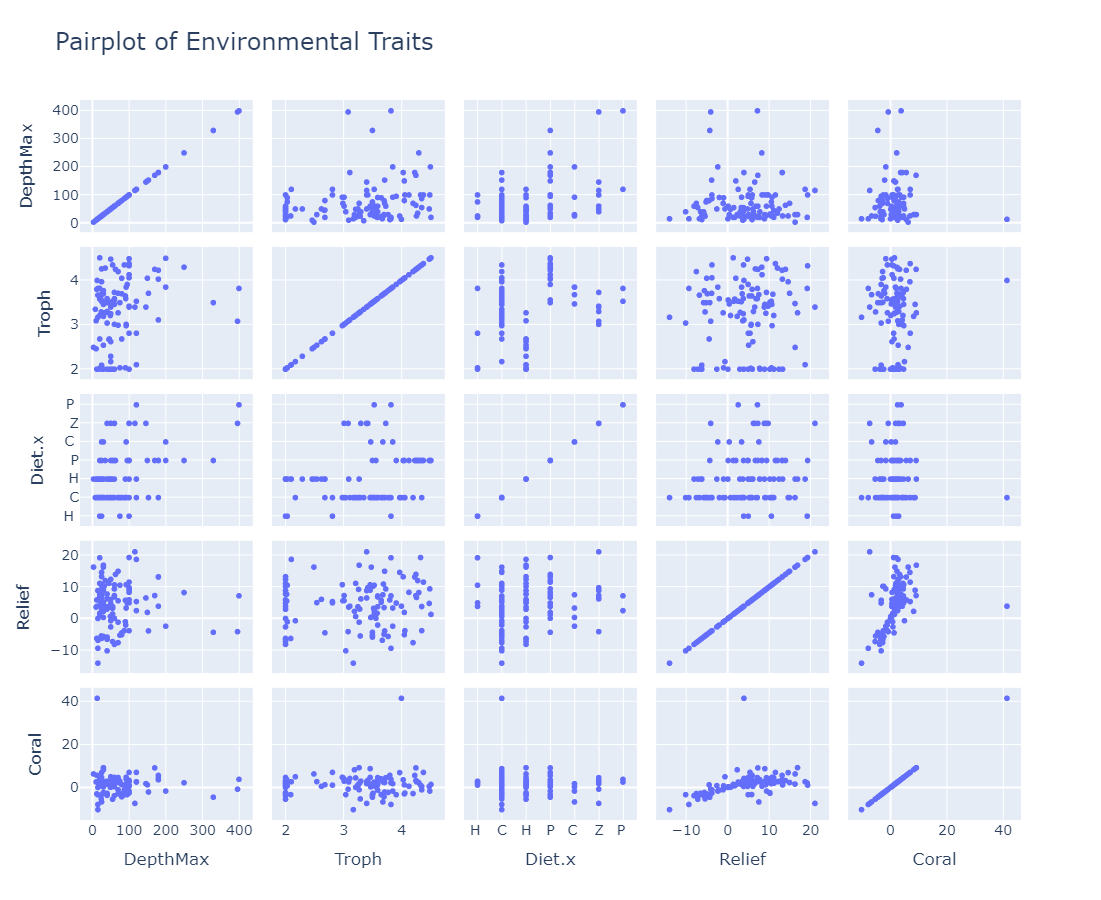

In [20]:
fig=px.scatter_matrix(environmental_data,
                      dimensions=['DepthMax', 'Troph', 'Diet.x', 'Relief', 'Coral'],
                      
                      title='Pairplot of Environmental Traits' 
                      
                     )

fig.update_layout(
    width=900,
    height=900,
    title_font_size=24,
    font_size=14
)

fig.show()

=> Coral and structural relief are typically found in shallow depths, as well as areas with higher trophic interactionsght_layout()
plt.show()


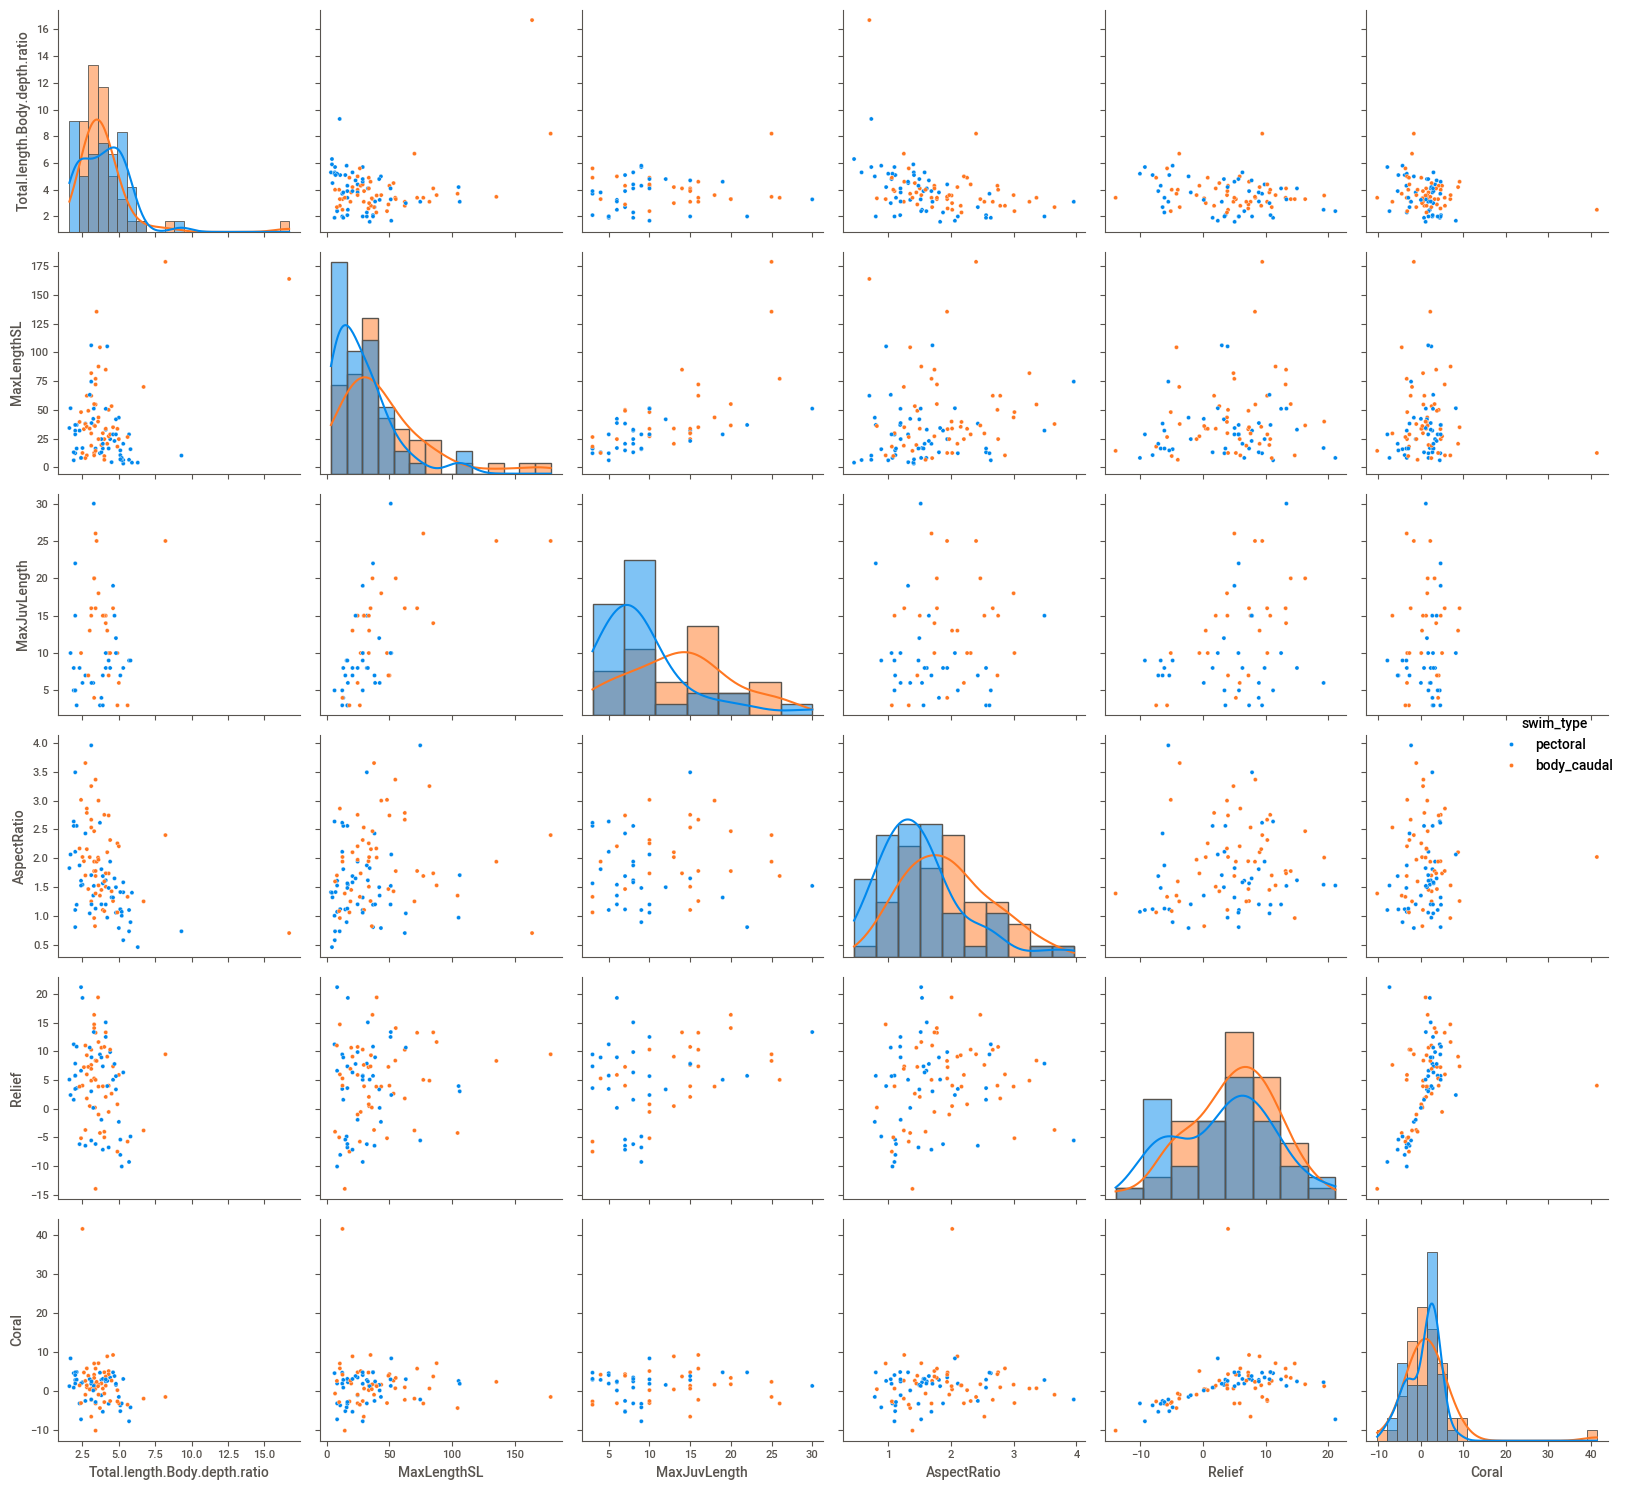

In [124]:

numerical_columns = ['Total.length.Body.depth.ratio', 'MaxLengthSL', 'MaxJuvLength', 'AspectRatio', 'Relief', 'Coral']
categorical_column = trait[trait['swim_type'].isin(['pectoral','body_caudal'])]

filtered_trait = trait[trait['swim_type'].isin(['pectoral', 'body_caudal'])]

g = sns.PairGrid(filtered_trait[numerical_columns + ['swim_type']], hue='swim_type')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()

plt.tight_layout()
plt.show()

In [81]:
#some random observations but worth the keeping

top_three_species = cat_data['Family'].value_counts().head(5).index
familyMax = cat_data.loc[cat_data['Family'].isin(top_three_species), :]
familyMax.head()


Species                        Sp         Family  \
0        Abudefduf saxatilis       Abudefduf_saxatilis  POMACENTRIDAE   
7   Anisotremus surinamensis  Anisotremus_surinamensis     HAEMULIDAE   
8     Anisotremus virginicus    Anisotremus_virginicus     HAEMULIDAE   
11            Bodianus rufus            Bodianus_rufus       LABRIDAE   
19   Cephalopholis cruentata   Cephalopholis_cruentata     SERRANIDAE   

            Genus          Spec    swim_type       swim_mode  \
0       Abudefduf     saxatilis     pectoral       labriform   
7     Anisotremus  surinamensis  body_caudal  subcarangiform   
8     Anisotremus    virginicus  body_caudal  subcarangiform   
11       Bodianus         rufus     pectoral       labriform   
19  Cephalopholis     cruentata  body_caudal  subcarangiform   

             body_shape Diet.x Diet.y Diel_activity   shoaling Size_group  \
0   short and / or deep     H      om           day   shoaling     smallg   
7   short and / or deep      C     im           day   solitary     smallg   
8   short and / or deep      C     im           day  schooling     smallg   
11             fusiform      C     im           day   solitary        sol   
19             fusiform      P     im           day   solitary        sol   

   Position.in.water.column. Level_water Spawn  Spawning Brackish  \
0                   demersal         low   DEM  demersal       NO   
7                   demersal         low   PEL   pelagic      YES   
8                   demersal         low   PEL   pelagic       NO   
11                  demersal         low   PEL   pelagic       NO   
19                  demersal      bottom   PEL   pelagic       NO   

   Multihabitat Rafter Home_range  
0            NO    YES        mob  
7            NO     NO        mob  
8            NO     NO        mob  
11           NO     NO        mob  
19          YES     NO        mob

In [82]:
familyMax['Family'].value_counts()

Family
LABRIDAE         24
SERRANIDAE       15
POMACENTRIDAE    13
HAEMULIDAE       11
GOBIIDAE          6
Name: count, dtype: int64

C:\Users\wafab\anaconda3\envs\profiling-env\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\wafab\AppData\Local\Temp\ipykernel_12156\2595356358.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\wafab\AppData\Local\Temp\ipykernel_12156\2595356358.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\wafab\AppData\Local\Temp\ipykernel_12156\2595356358.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



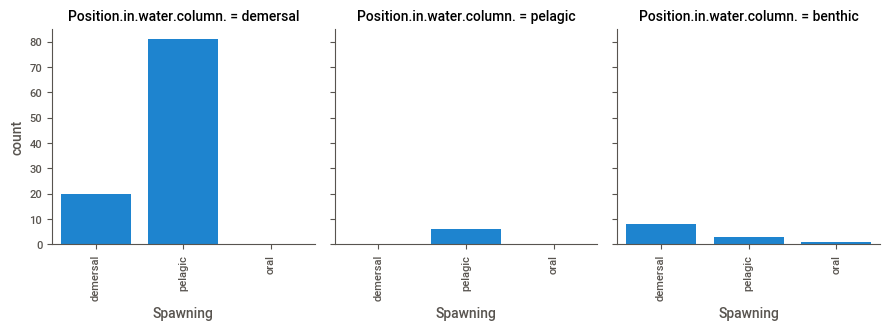

In [91]:
fig=sns.FacetGrid(trait,col='Position.in.water.column.',margin_titles=True)
fig.map(sns.countplot,'Spawning')
for ax in fig.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplots_adjust(top=0.9)
plt.show()

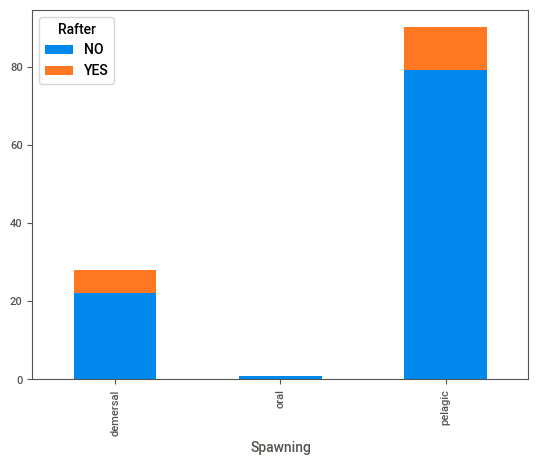

In [96]:
crossTab=pd.crosstab(trait['Spawning'],trait['Rafter'])
crossTab.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.show()

In [97]:
print(crossTab)

Rafter    NO  YES
Spawning         
demersal  22    6
oral       1    0
pelagic   79   11


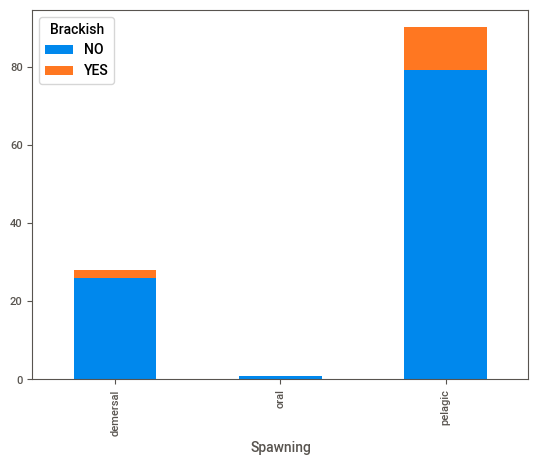

In [98]:
crossTab=pd.crosstab(trait['Spawning'],trait['Brackish'])
crossTab.plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.show()

=> In practical terms, the majority of spawning does not occur on rafters, nor does it take place in brackish water, indicating negative correlations with these environments

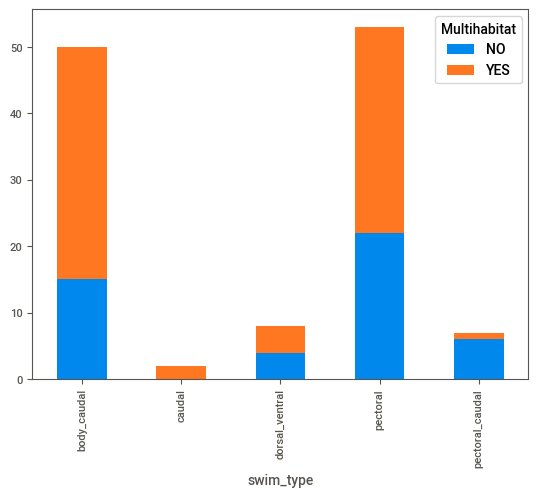

In [101]:
crossTab=pd.crosstab(trait['swim_type'],trait['Multihabitat'])
crossTab.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

==> Reef fishes with the most frequent swim types, body_caudal+++ and pectoral++, are predominantly multihabitat. The caudal swim type is associated 100% with multihabitat species.

In [88]:
numerical.columns

Index(['MaxLengthTL', 'Body_size_max', 'MaxLengthSL', 'MaxJuvLength',
       'AspectRatio', 'AspectRatio_Q', 'Log_AR',
       'Total.length.Body.depth.ratio', 'presence_defense', 'ComDepthMax',
       'DepthMax', 'Depth_min', 'Depth_max', 'Depth_range', 'Troph',
       'Trophic_level', 'Nocturnal', 'Specialist', 'Fished', 'Relief', 'Coral',
       'Cryptic', 'random'],
      dtype='object')

In [62]:
cat_data.columns

Index(['Species', 'Sp', 'Family', 'Genus', 'Spec', 'swim_type', 'swim_mode',
       'body_shape', 'Diet.x', 'Diet.y', 'Diel_activity', 'shoaling',
       'Size_group', 'Position.in.water.column.', 'Level_water', 'Spawn',
       'Spawning', 'Brackish', 'Multihabitat', 'Rafter', 'Home_range'],
      dtype='object')

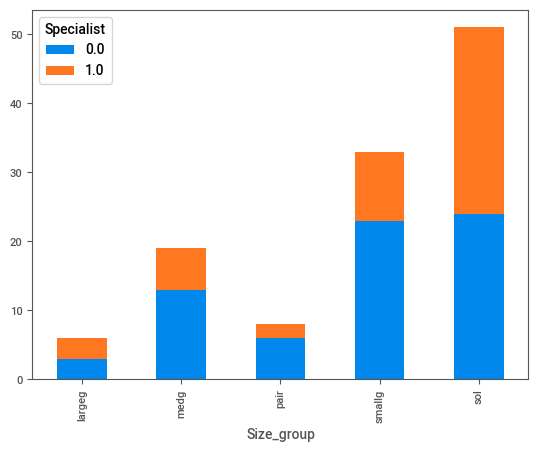

In [108]:
crossTab=pd.crosstab(trait['Size_group'],trait['Specialist'])
crossTab.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

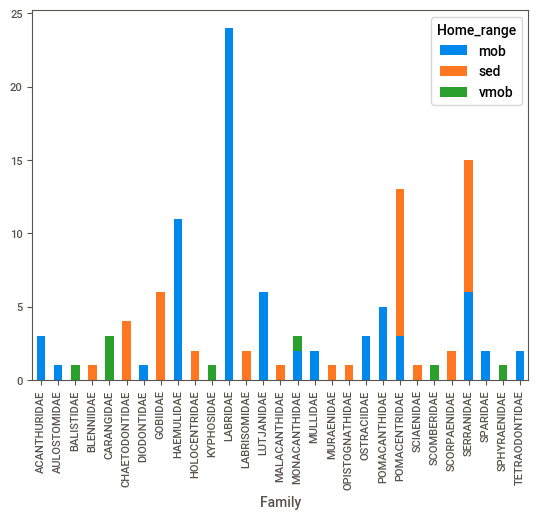

In [110]:
crossTab=pd.crosstab(trait['Family'],trait['Home_range'])
crossTab.plot(kind='bar',stacked=True)
plt.xticks(rotation=90)
plt.show()

==> The predominant family of reef fish is Labridae, which is exclusively mobile, followed by Pomacentridae, which is mostly sedentary. Scorpaenidae are mostly sedentary but include a significant range of mobile fish and then Haemulidae that are strictly mobile.
==> Overall, the predominant home range in families of reef fish in this dataset is mobile, but there is a significant portion of sedentary reef fishes.

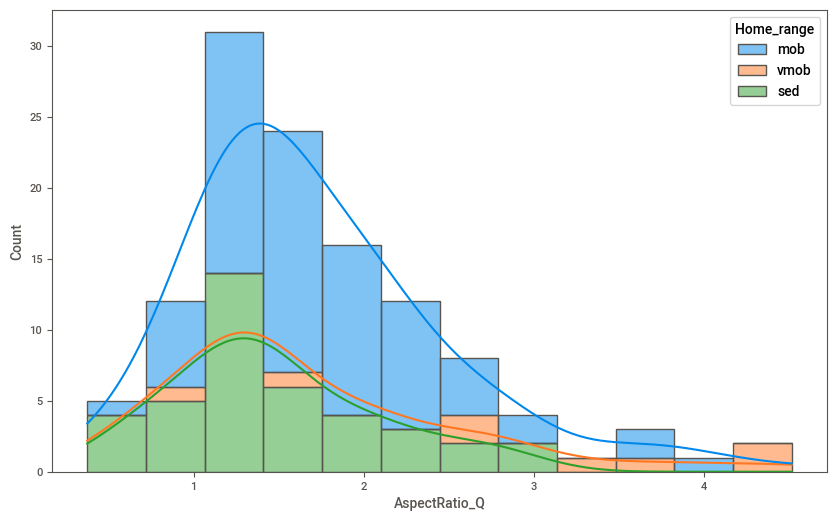

In [132]:
#plot home_range and aspect_ratioQ :

plt.figure(figsize=(10,6))
sns.histplot(data=trait, x='AspectRatio_Q', hue='Home_range', multiple='stack', kde=True)
plt.show()

==> The larger the caudal fin (indicated by a high aspect ratio), the more mobile the reef fish (denoted as "vmob", in orange). Conversely, smaller caudal fins (lower aspect ratios) are associated with more sedentary reef fish (denoted as "home range sed"). In this dataset, the maximum recorded aspect ratio values are less than 3, with a maximum count of 30 individuals,split between mobile and sedentary categories. However, overall, the most frequent category is the mobile reef fish.

body shape with relief /coral and caudal fin aspecct ratio with relief/coral +++//trophic level with relief coral (also maybe with size group)

C:\Users\wafab\AppData\Local\Temp\ipykernel_12156\3250037512.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




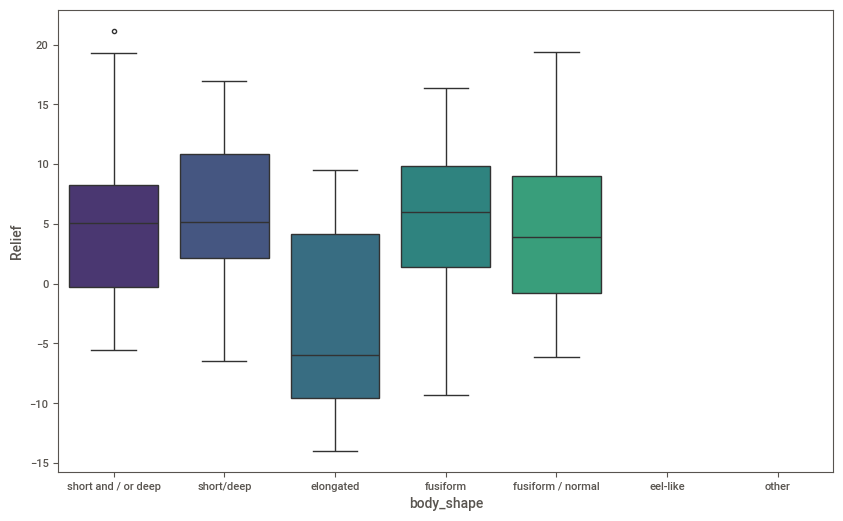

In [163]:
#body_shape VS relief and coral:
plt.figure(figsize=(10,6))
sns.boxplot(x='body_shape', y='Relief', data=trait, palette='viridis')
plt.show()

C:\Users\wafab\AppData\Local\Temp\ipykernel_12156\3550294114.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




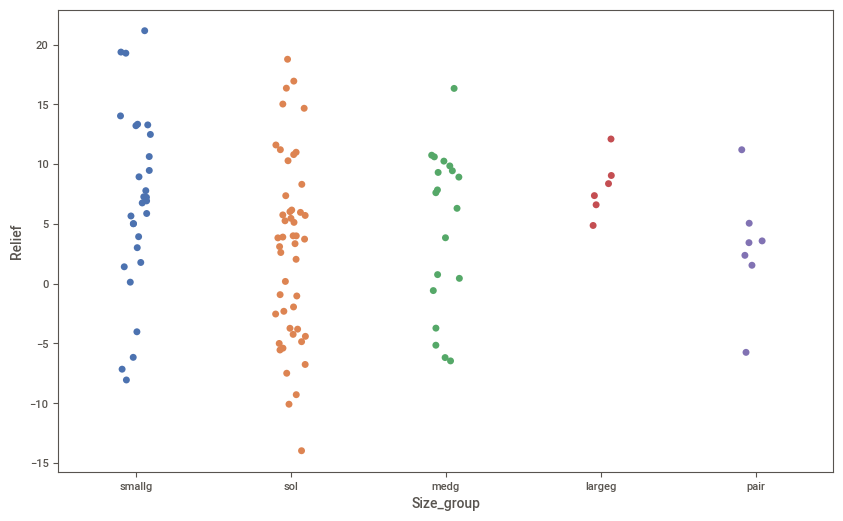

In [146]:

plt.figure(figsize=(10, 6))
sns.stripplot(x='Size_group', y='Relief', data=trait, jitter=True, palette='deep')


plt.show()


==> Reliefs are predominantly associated with small groups of reef fish and solitary fishes. Conversely, larger groups and pairs appear to be rare.

In [134]:
cat_data['body_shape'].unique()

array(['short and / or deep', 'short/deep', 'elongated', 'fusiform',
       'fusiform / normal', 'eel-like', 'other'], dtype=object)

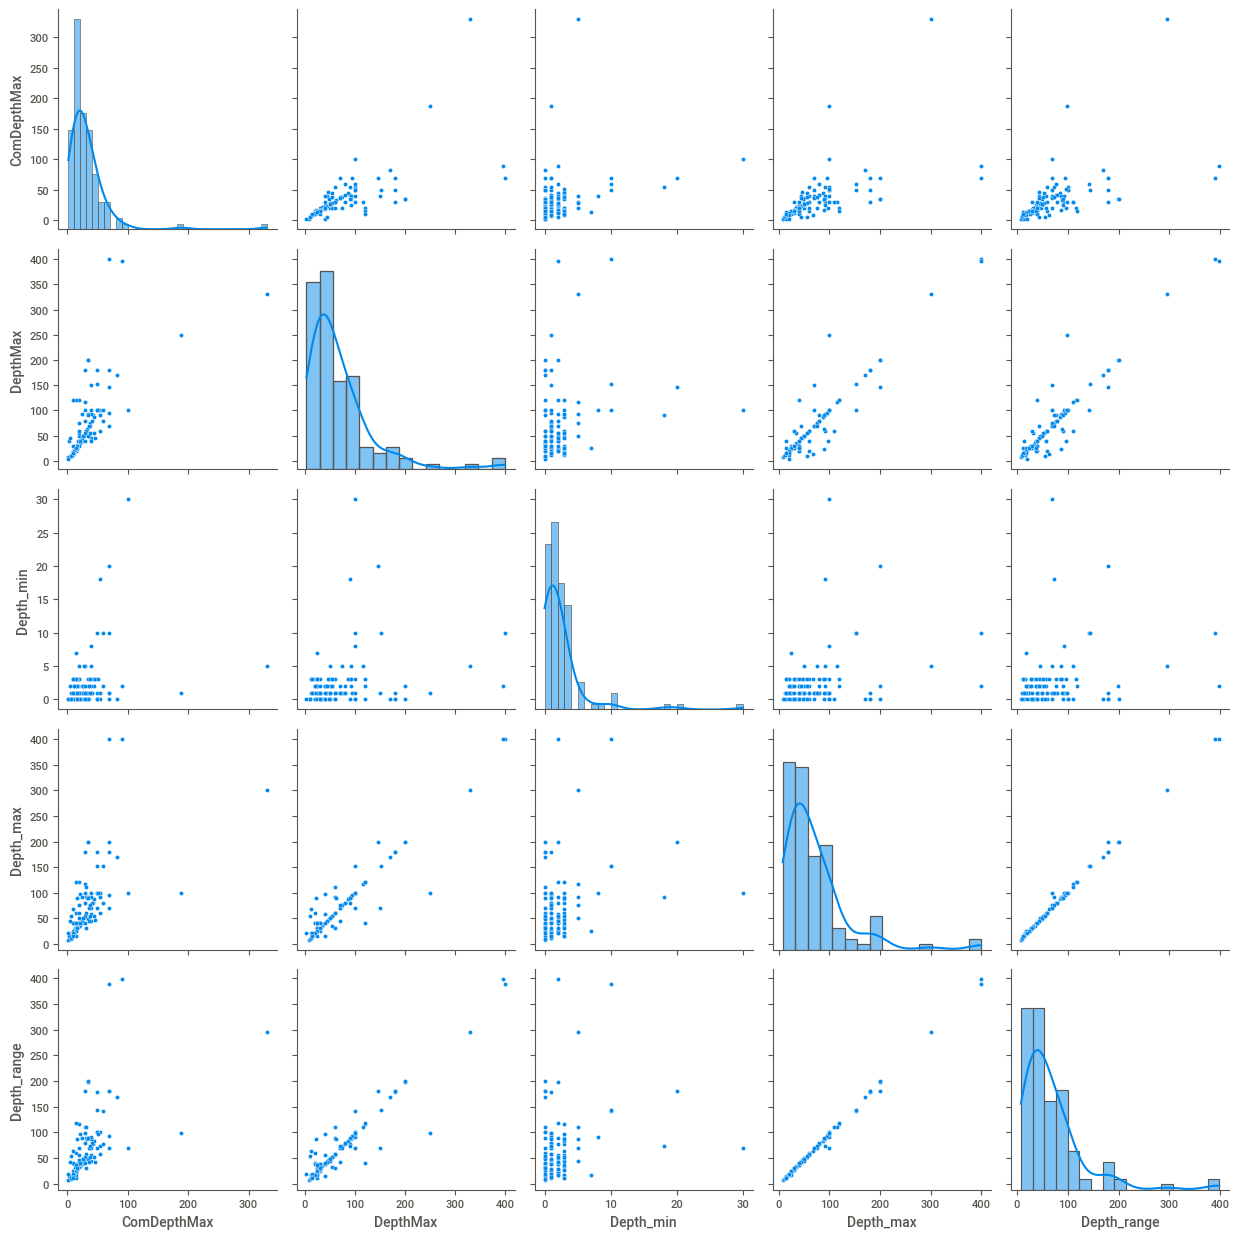

In [170]:

fig=sns.PairGrid(trait,vars=['ComDepthMax','DepthMax', 'Depth_min', 'Depth_max', 'Depth_range'])
fig.map_offdiag(sns.scatterplot)
fig.map_diag(sns.histplot, kde=True)
plt.tight_layout()
plt.show()

==> depth columns are highly correlated , so it would be better to get rid of some of them to avoid redundancy.

 *** HERE come's the part of the feature engeneering , apart from dropping the extraneous columns , there is creating new columns , wich i haven't seen yet the need for, maybe normalizing some values with the standard scaler,encoding categorical values,this, before merging the whole data , as for me the efficient feature engineering is when trying a simple prediction model like decision trees to see the efficiency of our correlations and the true importance of valuable features.